# Projet final - Apprentissage Statistique

## Introduction

Au cours de l’histoire de l’humanité, nous avons connu bon nombre de fléaux d’ordre divers: social comme les guerres mondiales, naturel comme les grandes sécheresses africaines et sanitaire comme les différentes épidémies et pandémies qui nous ont frappés. Sur le plan sanitaire, nous avons eu, entre autres, la peste noire au XIVe siècle causant entre 25 à 50 millions de morts en Europe; la grippe espagnole apparue à la fin de la première guerre mondiale causant entre 50 à 100 millions de morts dans le monde; et le VIH/SIDA à partir de 1981 causant près de 40 millions de morts et toujours actif à nos jours. Pour chacun de ces fléaux, les gouvernements ont dû déployer des efforts colossaux pour endiguer ces pandémies.
Plus récemment, en 2019, le Covid-19 est venu bouleverser le monde entier, révélant les forces et les faiblesses des systèmes de santé, des politiques publiques et des mécanismes de réaction face à une crise sanitaire d’envergure mondiale. Cette pandémie a transformé durablement nos comportements individuels et collectifs. Elle nous a, entre autres, forcé à instaurer: le travail à distance, la distanciation sociale, la digitalisation accélérée, l’usage des masques. Elle a imposé ou accéléré des changements structurels dans les domaines de la santé, de l’éducation, du travail et de la mobilité. Finalement, elle a aussi fait émerger de nouvelles valeurs dominantes comme la solidarité, la résilience, la vigilance sanitaire, et même la méfiance envers certaines institutions.

Dans ce contexte de crise mondiale, les regards se sont vite tournés vers l’Asie, épicentre initial de la pandémie. Cette région est aussi marquée par une diversité remarquable dans la gestion de la crise. Dès les premiers mois après l'apparition de la maladie, plusieurs pays d’Asie ont été salués pour leur réactivité, leur discipline collective et leur capacité à déployer des technologies avancées pour ralentir, voire freiner, la propagation du virus. Cependant, d’autres pays ont été confrontés à des défis majeurs liés à des ressources limitées, des contraintes géographiques et de l'instabilité politique.

Tout cela montre que l’Asie ne constitue pas un bloc homogène par rapport à la gestion de la crise du Covid-19. Les stratégies adoptées, qu’il s’agisse de confinement strict, de gestion centralisée des données sanitaires, de campagnes de vaccination ou de communication publique, varient grandement d’un pays à l’autre. C’est dans cette optique que notre projet s’inscrit. L’objectif est de dégager des blocs relativement homogènes de pays de l’Asie du Sud-Est dans le cadre de la lutte contre la pandémie du coronavirus.


## Objectifs

Objectifs du travail
Comme énoncé, l’objectif principal du présent projet est d’identifier des groupes de pays asiatiques présentant des similarités dans leur gestion de la pandémie de Covid-19. Deux objectifs sous-jacents à celui-là est de:

* identifier les pays qui ont réagi correctement face à la pandémie et explorer leurs méthodes d’implémentation des stratégies pour arrêter la propagation du virus;
* identifier les pays qui ont du mal face à la crise pour voir dans quelles mesures ils peuvent être assistés.


## Méthodologie

Pour atteindre nos objectifs, nous allons analyser la base de données qui nous a été fournie à partir du site Worldometers.info, site répertoriant toutes les mesures faites sur la population mondiale. Nous allons commencer par une phase d’exploration des données en regardant la structure des données, s’il y a des valeurs manquantes, des cas de duplication, des valeurs aberrantes, leur traitement le cas échéant. Puis nous procéderons à une analyse univariée et bivariée pour essayer de dégager quelques tendances des variables qui nous ont été proposées. Et finalement, nous allons implémenter des algorithmes de machine learning qui pourront nous aider à regrouper les pays de notre table selon leurs performances face à la crise du Covid-19.

### Chargement des librairies nécessaires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import numpy as np
from math import pi

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
from scipy.stats import shapiro

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

### Lecture des données

In [3]:
df = pd.read_csv('CovidCases.csv')
df

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
0,1,Yemen,9369,1778.0,5921,1670,306,58.0,265253.0,8651.0,30660443
1,2,Vietnam,839662,20555.0,782199,36908,8529,209.0,42517091.0,431850.0,98453377
2,3,Uzbekistan,178637,1271.0,174213,3153,5241,37.0,1377915.0,40425.0,34086135
3,4,UAE,737890,2114.0,731295,4481,73477,211.0,87246490.0,8687776.0,10042442
4,5,Turkey,7444552,66180.0,6893476,484896,87077,774.0,89847975.0,1050928.0,85493959
5,6,Timor-Leste,19673,119.0,19332,222,14569,88.0,169501.0,125523.0,1350361
6,7,Thailand,1720919,17751.0,1592903,110265,24576,254.0,9201621.0,131408.0,70023091
7,8,Tajikistan,17084,124.0,16960,0,1742,13.0,NaN,NaN,9809760
8,9,Taiwan,16305,846.0,15306,153,683,35.0,6754661.0,282957.0,23871692
9,10,Syria,36953,2341.0,24503,10109,2048,130.0,103566.0,5741.0,18040518


### Phase exploratoire des données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49 non-null     int64  
 1   Country                49 non-null     object 
 2   TotalCases             49 non-null     int64  
 3   TotalDeaths            48 non-null     float64
 4   TotalRecovered         49 non-null     int64  
 5   ActiveCases            49 non-null     int64  
 6   TotalCasesPerMillion   49 non-null     int64  
 7   TotalDeathsPerMillion  48 non-null     float64
 8   TotalTests             48 non-null     float64
 9   TotalTestsPerMillion   48 non-null     float64
 10  TotalPopulation        49 non-null     int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 4.3+ KB


## Traitement des valeurs manquantes

In [6]:
df[df['TotalDeaths'].isnull()]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
24,25,Macao,77,NaN,64,13,117,NaN,4951.0,7495.0,660595


In [7]:
df.loc[(df['Country'] == 'Macao'), 'TotalDeaths'] = 0
df.loc[(df['Country'] == 'Macao'), 'TotalDeathsPerMillion'] = 0

In [8]:
df[df['TotalTests'].isnull()]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
7,8,Tajikistan,17084,124.0,16960,0,1742,13.0,NaN,NaN,9809760


In [9]:
# Remplacement par la valeur calculée selon la source russe
df.loc[(df['Country'] == 'Tajikistan'), 'TotalTests'] = 441500
df.loc[(df['Country'] == 'Tajikistan'), 'TotalTestsPerMillion'] = round((df['TotalTests']/df['TotalPopulation']) * 1000000, 0)

In [10]:
df[df['Country'] == 'Tajikistan']

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation
7,8,Tajikistan,17084,124.0,16960,0,1742,13.0,441500.0,45006.0,9809760


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     49 non-null     int64  
 1   Country                49 non-null     object 
 2   TotalCases             49 non-null     int64  
 3   TotalDeaths            49 non-null     float64
 4   TotalRecovered         49 non-null     int64  
 5   ActiveCases            49 non-null     int64  
 6   TotalCasesPerMillion   49 non-null     int64  
 7   TotalDeathsPerMillion  49 non-null     float64
 8   TotalTests             49 non-null     float64
 9   TotalTestsPerMillion   49 non-null     float64
 10  TotalPopulation        49 non-null     int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 4.3+ KB


## Création d'indices

In [13]:
df['FatalityRate'] = (df['TotalDeaths']/df['TotalCases'])*100
df['RecoveryRate'] = (df['TotalRecovered']/df['TotalCases'])*100
df['MortalityRate'] = (df['TotalDeaths']/df['TotalPopulation'])*100
df['InfectionRate'] = (df['TotalCases']/df['TotalPopulation'])*100
df['ActiveCaseRate'] = (df['ActiveCases']/df['TotalCases'])*100
df['TestRate'] = (df['TotalTests']/df['TotalPopulation'])*100
df['PositivityRate'] = (df['TotalCases']/df['TotalTests'])*100
df['TestToCaseRatio'] = df['TotalTests']/df['TotalCases']

Tout comme les approches explorées précédemment, l’objectif ici est de parvenir à une segmentation des pays d’Asie du Sud-Est en nous basant sur les taux et ratio calculés à partir des données qui nous ont été fournies. Pour rappel, ces taux et ratio  sont:

-	Le taux de létalité: proportion de personnes infectées par le virus qui sont décédées.
-	Le taux de guérison: proportion de personnes infectées par le virus qui sont déclarées guéries.
-	Le taux de mortalité: part de la population totale du pays qui est décédée du virus.
-	Le taux d’infection: proportion de la population qui a été contaminée par le virus.
-	Le taux de cas actifs: part de la population actuellement porteuse du virus (ni décédée ni guérie).
-	Le taux de test par habitant: nombre de test effectué rapport à la population totale.
-	Le taux de positivité: proportion des tests qui se sont révélés positifs.
-	Le ratio tests par cas détecté: nombre de tests réalisés pour chaque cas positif détecté.


In [14]:
df.columns

Index(['ID', 'Country', 'TotalCases', 'TotalDeaths', 'TotalRecovered',
       'ActiveCases', 'TotalCasesPerMillion', 'TotalDeathsPerMillion',
       'TotalTests', 'TotalTestsPerMillion', 'TotalPopulation', 'FatalityRate',
       'RecoveryRate', 'MortalityRate', 'InfectionRate', 'ActiveCaseRate',
       'TestRate', 'PositivityRate', 'TestToCaseRatio'],
      dtype='object')

In [15]:
df.head(3)

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation,FatalityRate,RecoveryRate,MortalityRate,InfectionRate,ActiveCaseRate,TestRate,PositivityRate,TestToCaseRatio
0,1,Yemen,9369,1778.0,5921,1670,306,58.0,265253.0,8651.0,30660443,18.977479,63.197780,0.005799,0.030557,17.824741,0.865131,3.532100,28.311773
1,2,Vietnam,839662,20555.0,782199,36908,8529,209.0,42517091.0,431850.0,98453377,2.448009,93.156413,0.020878,0.852852,4.395578,43.185000,1.974881,50.635959
2,3,Uzbekistan,178637,1271.0,174213,3153,5241,37.0,1377915.0,40425.0,34086135,0.711499,97.523469,0.003729,0.524075,1.765032,4.042450,12.964298,7.713492


### Création d'une nouvelle table pour les analyses

In [17]:
new_df = df[['Country', 'FatalityRate', 'RecoveryRate', 'MortalityRate', 'InfectionRate', 'ActiveCaseRate', 'TestRate', 'PositivityRate', 'TestToCaseRatio']]
new_df.head(3)

,Country,FatalityRate,RecoveryRate,MortalityRate,InfectionRate,ActiveCaseRate,TestRate,PositivityRate,TestToCaseRatio
0,Yemen,18.977479,63.197780,0.005799,0.030557,17.824741,0.865131,3.532100,28.311773
1,Vietnam,2.448009,93.156413,0.020878,0.852852,4.395578,43.185000,1.974881,50.635959
2,Uzbekistan,0.711499,97.523469,0.003729,0.524075,1.765032,4.042450,12.964298,7.713492


In [18]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FatalityRate,49.0,1.900781,2.850525,0.000000,0.606277,1.297106,2.042446,18.977479
RecoveryRate,49.0,91.197937,12.925676,22.978276,91.497451,94.774719,97.534113,99.617298
MortalityRate,49.0,0.044611,0.048864,0.000000,0.012430,0.032264,0.061925,0.232924
InfectionRate,49.0,4.387161,4.625640,0.006699,0.648443,2.431280,7.871430,15.971798
ActiveCaseRate,49.0,6.901282,12.351975,0.000000,0.739450,3.027706,6.407332,76.930624
TestRate,49.0,115.026313,185.176791,0.574074,13.140838,41.769344,102.533456,868.777634
PositivityRate,49.0,8.197643,6.879394,0.047949,2.227862,7.405834,11.606421,35.680629
TestToCaseRatio,49.0,117.108744,378.429836,2.802641,8.615920,13.502868,44.886080,2085.537941


### **Observations**

Ce tableau montre bien que ces variables sont majoritairement comprises entre 0 et 100. Nous constatons cependant que 2 d’entre elles dépassent 100. La raison est simple. Pour “TestRate”, il est possible que le nombre de test réalisé dépasse la population totale car une personne peut être testée plusieurs fois. Pour “TestToCaseRatio”, cette variable mesurant le nombre de test moyen pour un cas positif, il est normal qu’elle prenne des valeurs différentes de 1 et même élevées.

Ce qui attire notre attention dans ce tableau aussi c’est l’écart, parfois trop flagrant, entre la médiane et le maximum. Par exemple, pour “FatalityRate”, nous notons une médiane à 1.29% tandis que le maximum est à près 19%. De même pour “MortalityRate” (médiane: 0.03 et max: 0.23), “InfectionRate” (2.43 contre 16%), “ActiveCaseRate” (3.02 contre 77%)... Ces écarts montrent une forte dispersion dans la distribution des données et témoignent de l’hétérogénéité des pays de l’Asie du Sud-Est par rapport à leur comportement face au covid-19.

In [19]:
num_cols = new_df.select_dtypes('number').columns.tolist()
num_cols

['FatalityRate',
 'RecoveryRate',
 'MortalityRate',
 'InfectionRate',
 'ActiveCaseRate',
 'TestRate',
 'PositivityRate',
 'TestToCaseRatio']

## Brève analyse univariée

FatalityRate
Skew: 4.78


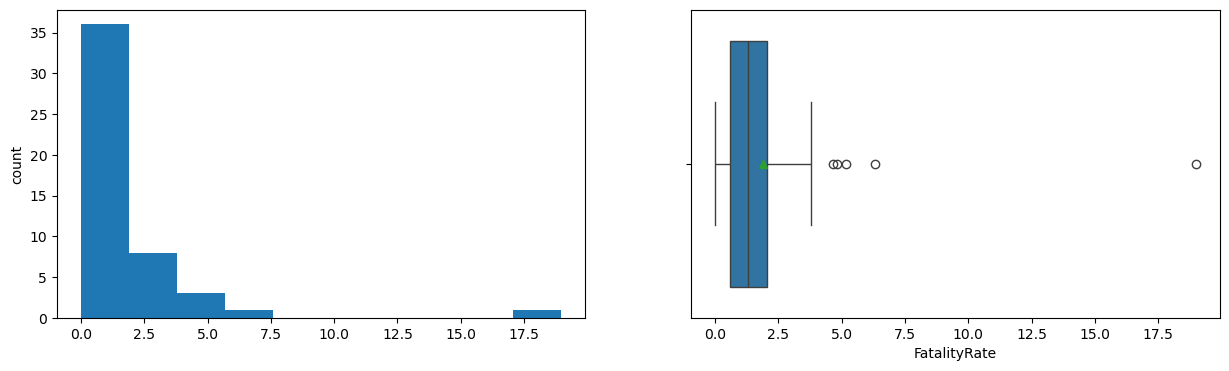

RecoveryRate
Skew: -3.61


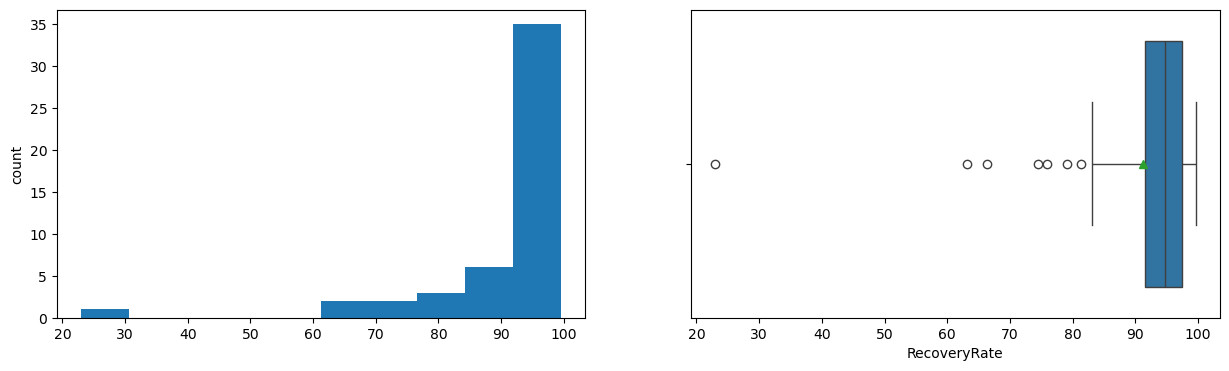

MortalityRate
Skew: 1.95


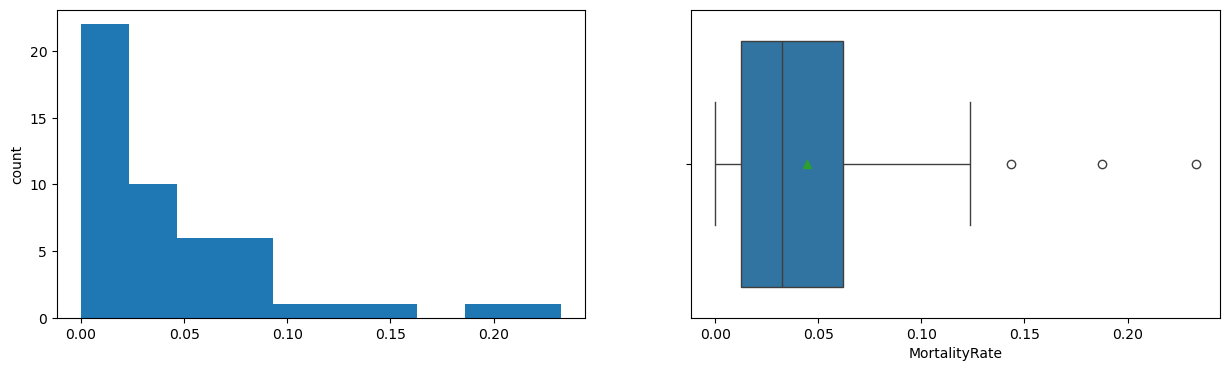

InfectionRate
Skew: 1.08


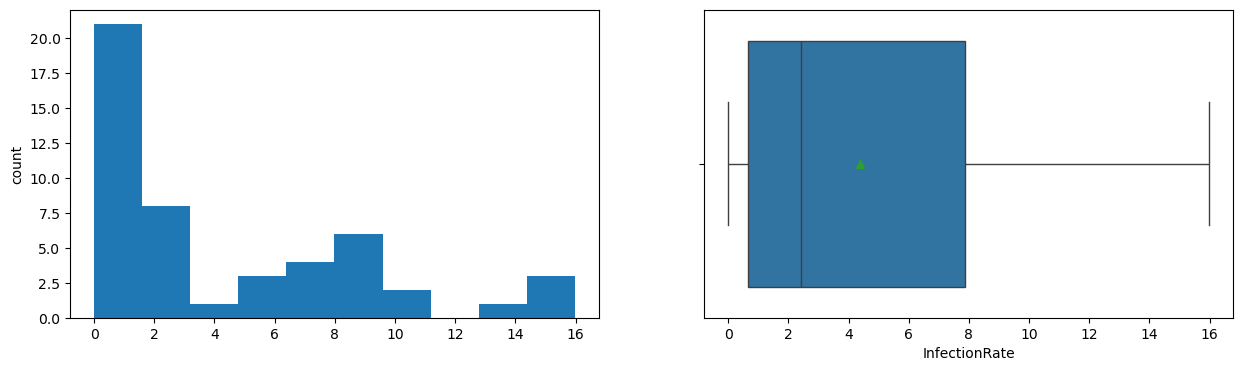

ActiveCaseRate
Skew: 4.18


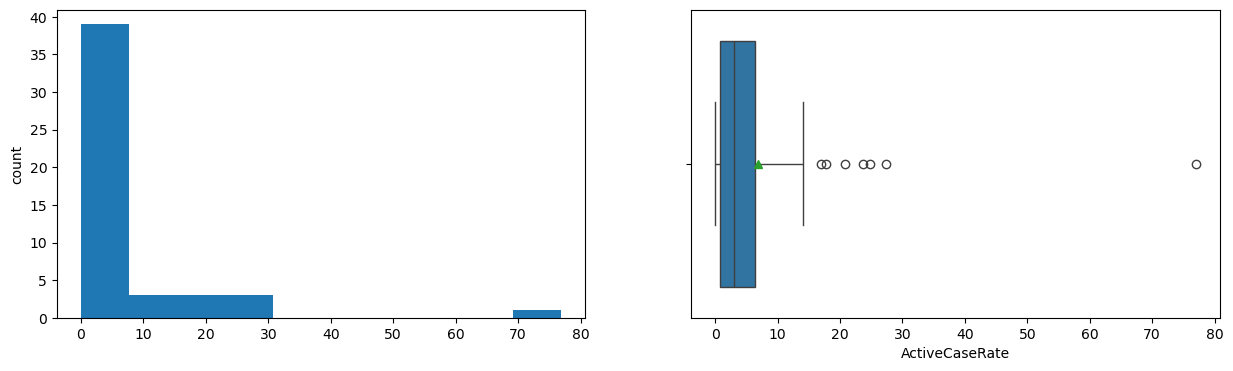

TestRate
Skew: 2.68


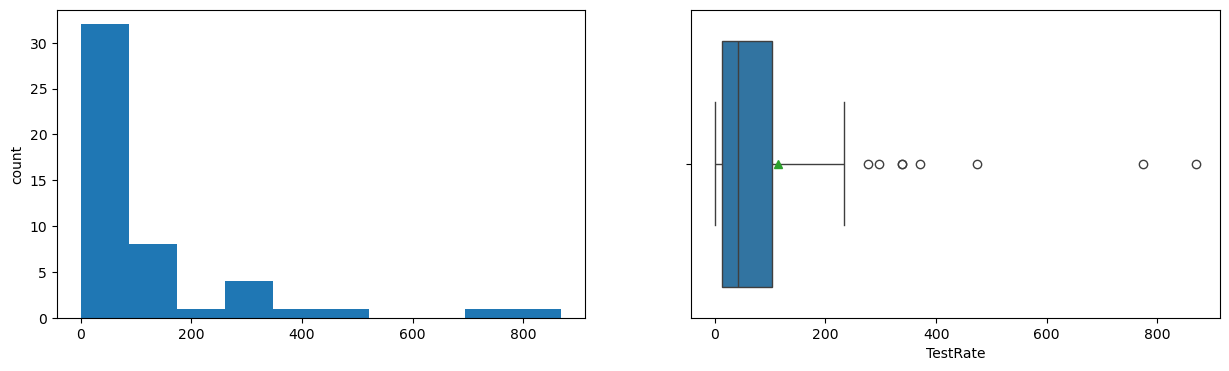

PositivityRate
Skew: 1.48


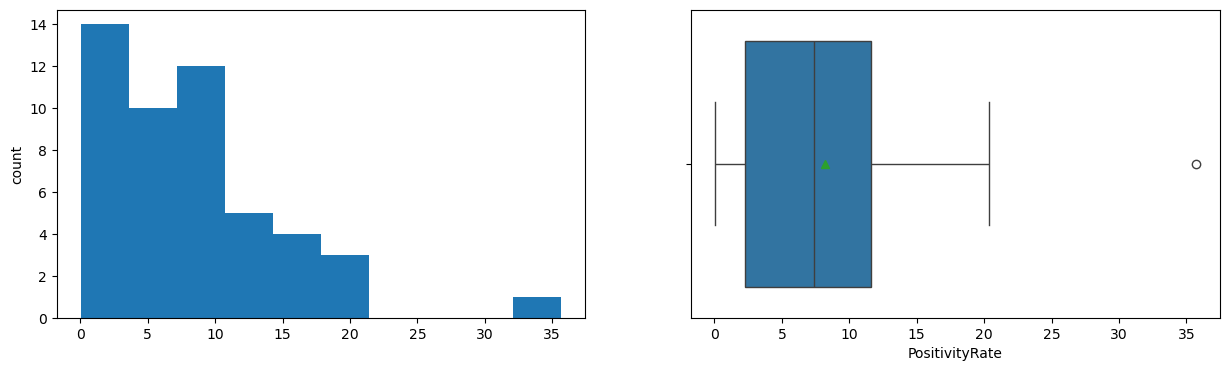

TestToCaseRatio
Skew: 4.53


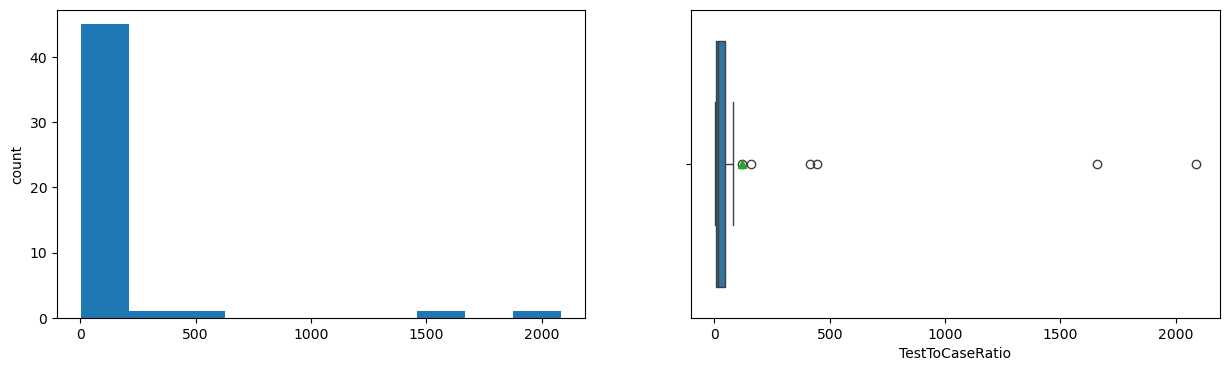

In [21]:
for column in num_cols:
    print(column)

    print(f"Skew: {round(new_df[column].skew(), 2)}")
    
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    new_df[column].hist(bins = 10, grid = False)
    plt.ylabel("count")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x = new_df[column], showmeans = True)
    plt.show()

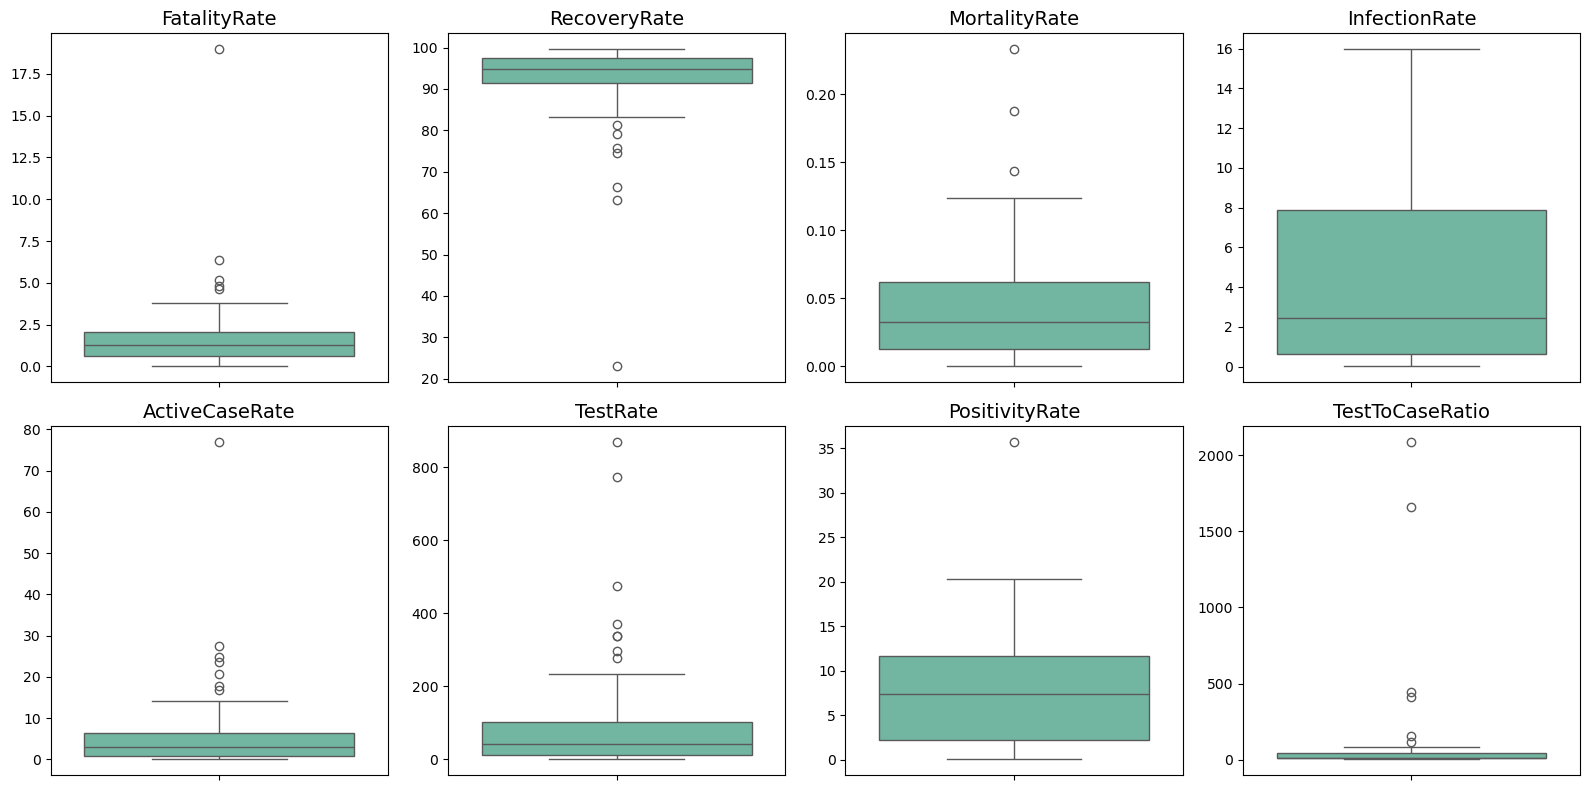

In [22]:
# Liste des variables à représenter
indicators = [
    'FatalityRate', 'RecoveryRate', 'MortalityRate', 'InfectionRate',
    'ActiveCaseRate', 'TestRate', 'PositivityRate', 'TestToCaseRatio'
]

# Création des sous-graphiques
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Création des boxplots
for i, col in enumerate(indicators):
    sns.boxplot(data=new_df, y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel("")  # facultatif pour alléger visuellement
    axes[i].grid(False)

# Ajustement de l'espacement
plt.tight_layout()
plt.show()

### **Observations**

Ces boîtes à moustache font ressortir les valeurs aberrantes de notre nouveau jeu de données. Elles mettent en lumière des situations extrêmes, soit favorables (TestRate), soit très critiques (létalité ou positivité très élevées). Ces valeurs doivent être analysées en contexte, car la taille de la population ou la capacité à lutter contre l’épidémie peut varier grandement d’un pays à un autre.

## Test de normalité des variables

In [24]:
# Initialisation de la liste de résultats
resultats = []

# Boucle sur les colonnes numériques
for colonne in num_cols:
    stat, p = shapiro(new_df[colonne])
    resultats.append({
        'variable': colonne,
        'statistique': stat,
        'p_value': p
    })

# Création du DataFrame final
df_resultats = pd.DataFrame(resultats)

# Affichage
df_resultats

,variable,statistique,p_value
0,FatalityRate,0.506811,1.341863e-11
1,RecoveryRate,0.584611,1.514698e-10
2,MortalityRate,0.802461,1.214410e-06
3,InfectionRate,0.837439,8.582352e-06
4,ActiveCaseRate,0.530631,2.735716e-11
5,TestRate,0.626847,6.440920e-10
6,PositivityRate,0.888547,2.371234e-04
7,TestToCaseRatio,0.313277,8.654040e-14


### **Observation**

Avec une p-value inférieure à 0.05, aucune de nos variables n'est normalement distribuée.

## Coefficients de corrélation

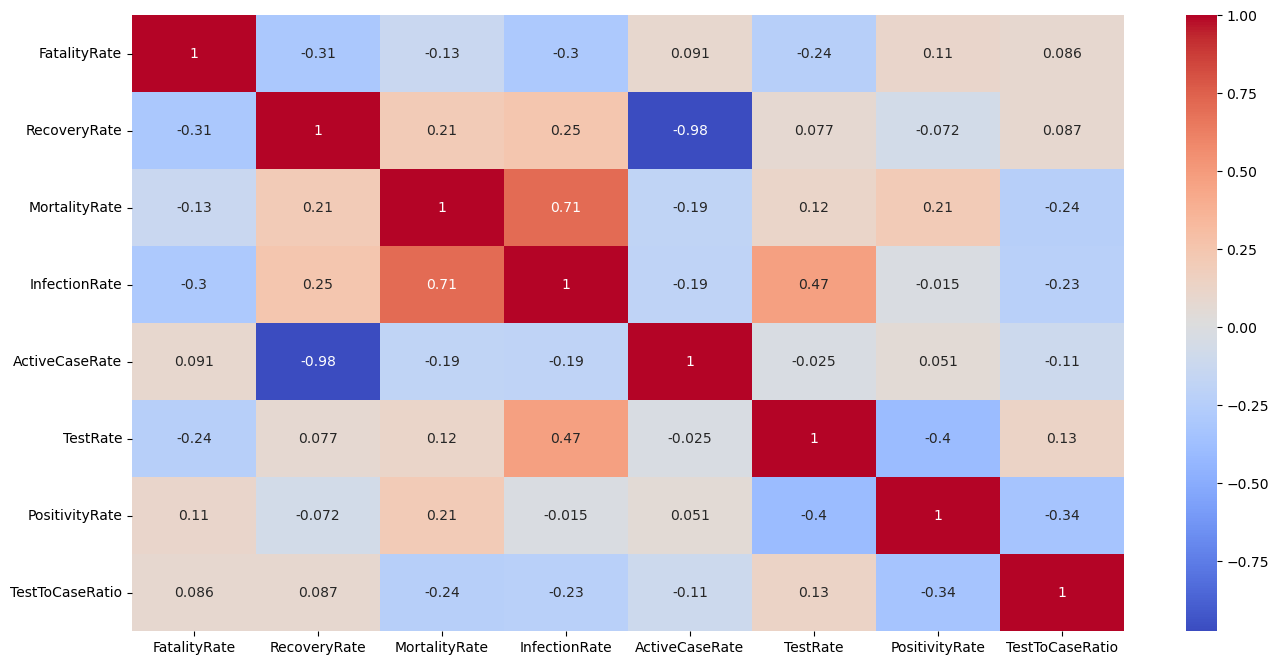

In [26]:
plt.figure(figsize = (16, 8))
sns.heatmap(new_df[num_cols].corr(), annot = True, cmap = "coolwarm")
plt.show()

### **Observation**

Nous n’avons pas de niveau de corrélation trop élevé, mis à part le coefficient de InfectionRate et MortalityRate (0.71), ce qui est normal car le taux de mortalité risque fort de grimper à mesure que le nombre de personnes contaminées augmente.

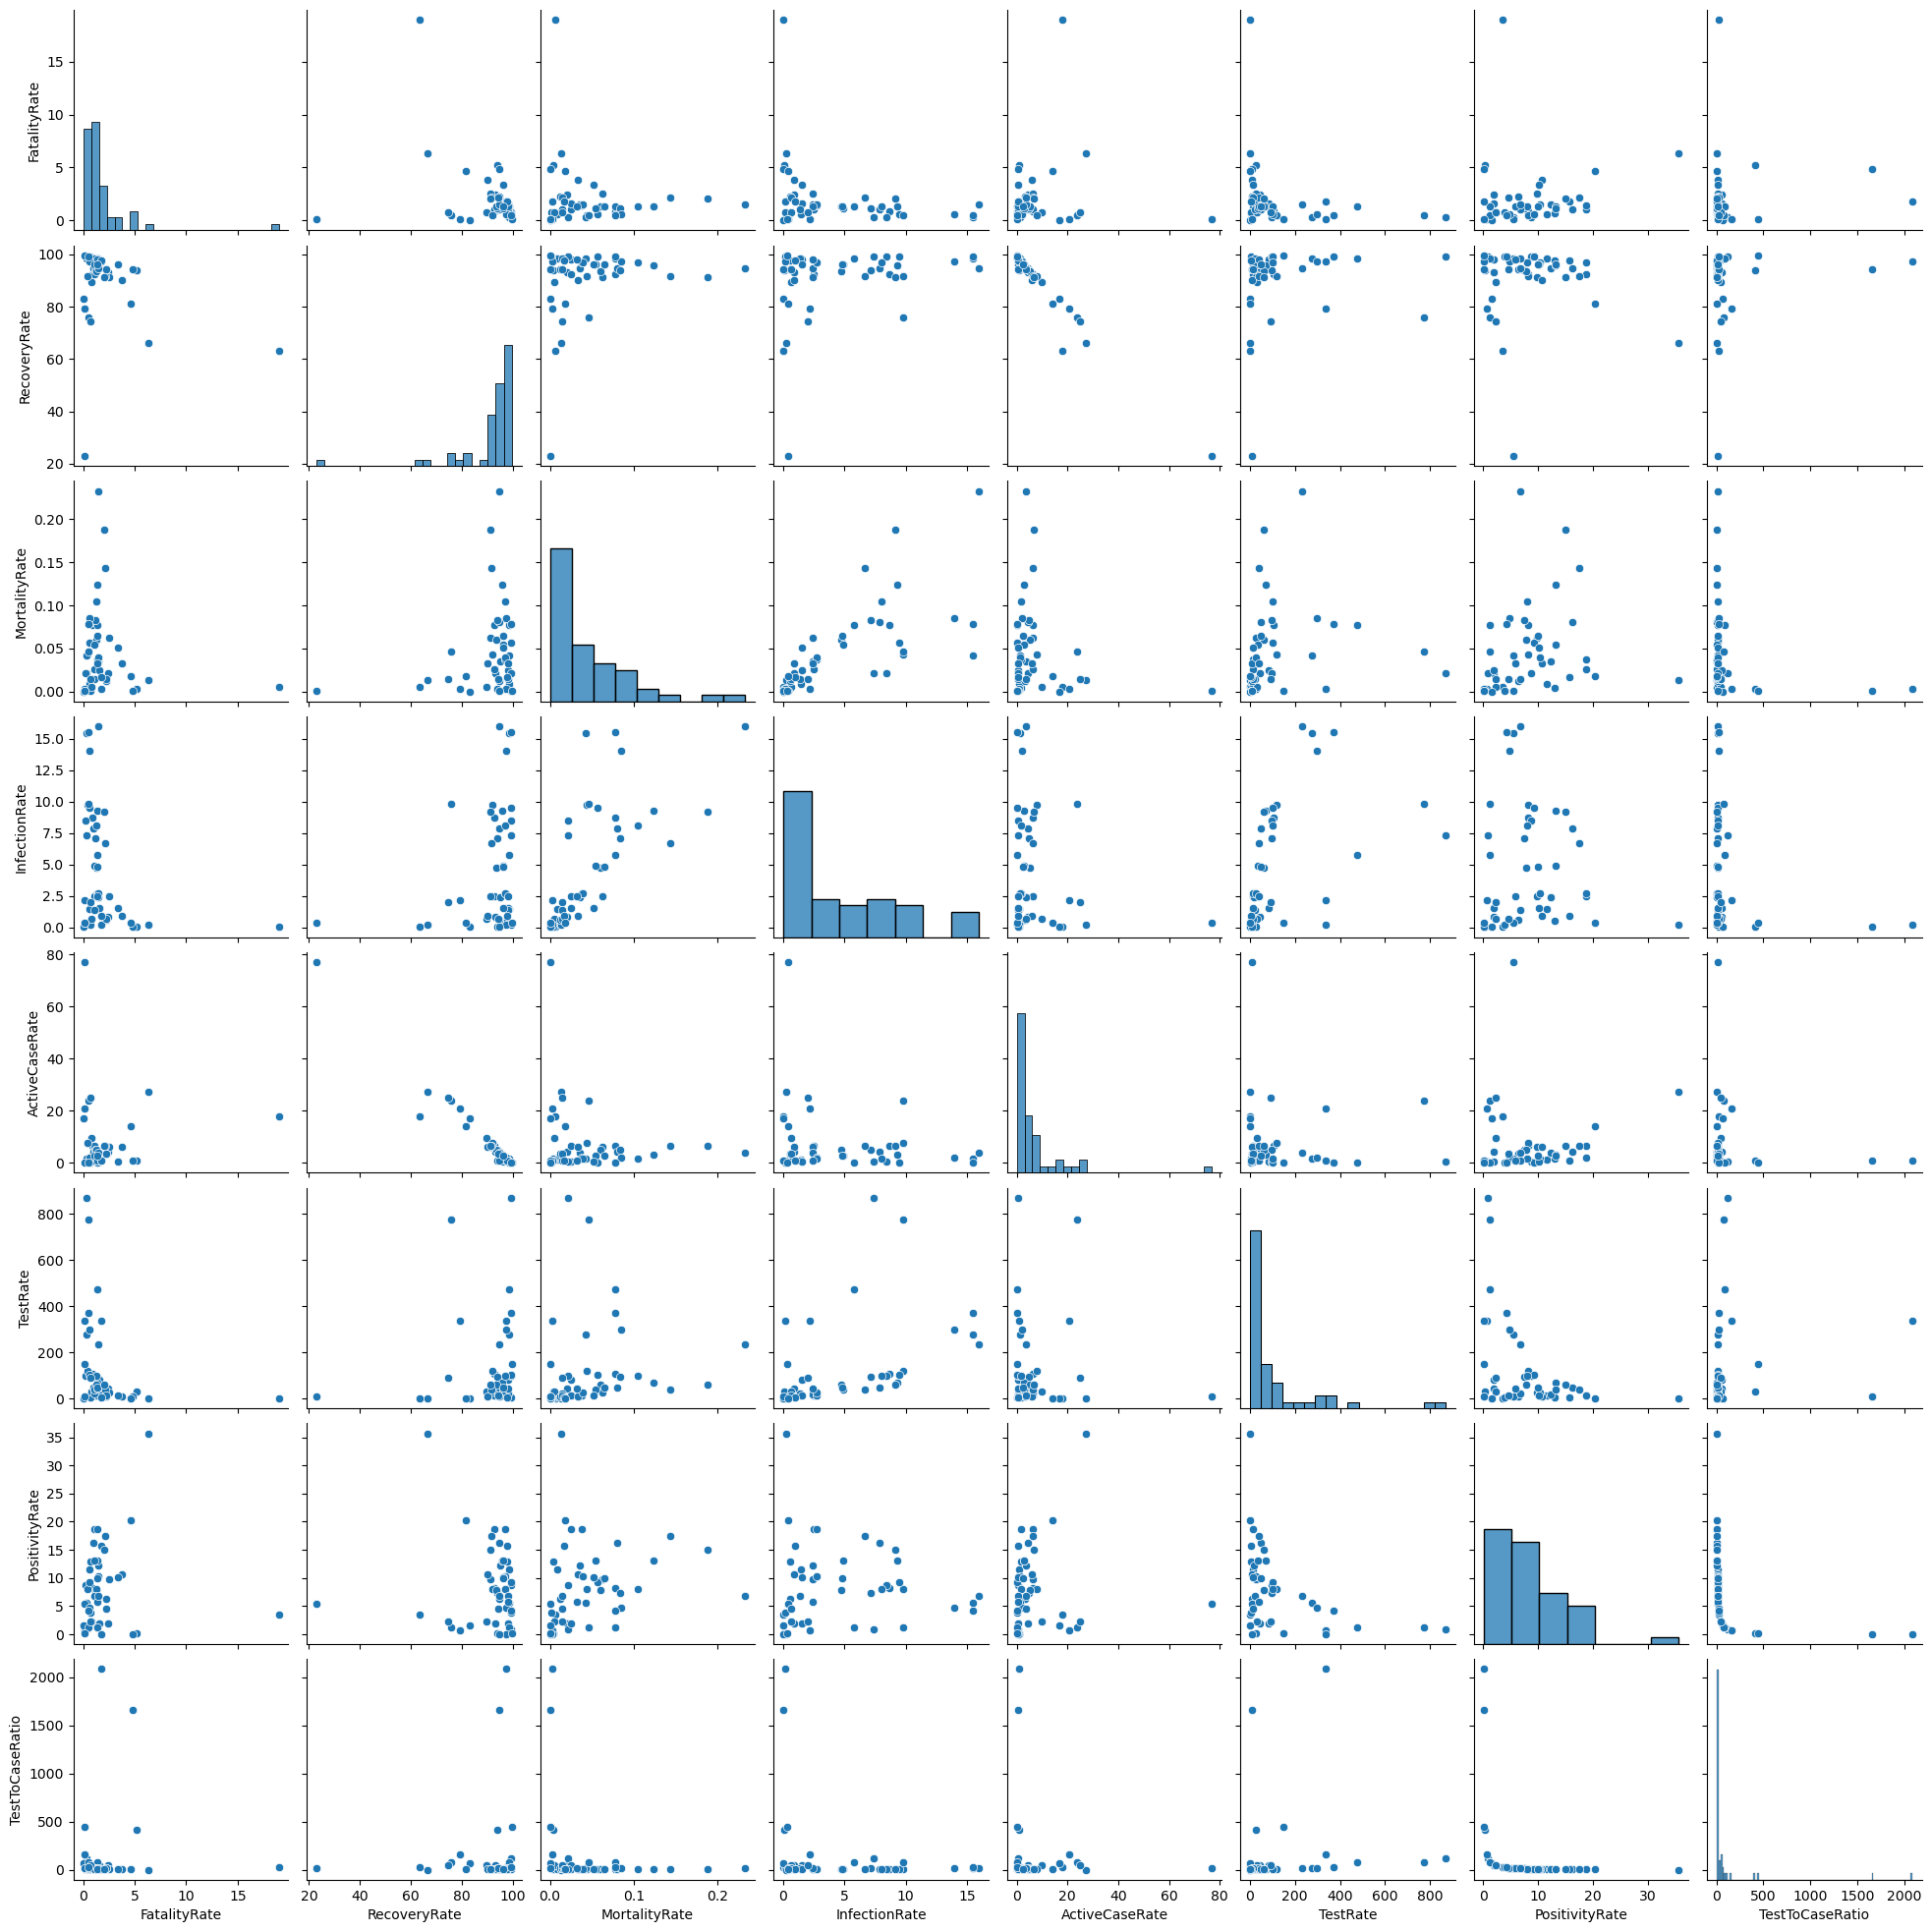

In [27]:
sns.pairplot(new_df[num_cols], palette='Set2')

Passons maintenant à la segmentation de nos observations pour identifier d’éventuels groupes de pays qui ont présenté un comportement similaire. 

## Réduction de dimension

Nous appliquons par la suite deux (2) méthodes de réduction de dimensionnalité pour représenter graphiquement les clusters. Pour cela, nous utilisons l’analyse en composantes principales (ACP) qui est une méthode linéaire, et le t-distributed Stochastic Neighbor Embedding (t-SNE) qui est une méthode non-linéaire. L’avantage avec le t-SNE est qu’il permet de:

-	conserver la proximité locale entre les points (les voisins proches restent proches),
-	mettre en évidence des groupes ou des structures dans les données (exemple clusters),
-	être très utile après des algorithmes de clustering pour visualiser les segmentations.

Les composantes obtenues nous serviront aussi à visualiser les résultats des autres algorithmes que nous appliquerons ultérieurement.


In [29]:
# PCA
pca = PCA()
pca.fit(new_df[num_cols])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance: {explained_variance}")

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative variance: {cumulative_variance}")

Explained variance: [8.09502901e-01 1.88396570e-01 1.76293694e-03 2.03078823e-04
 7.93007533e-05 5.52070878e-05 5.57250856e-09 7.82224440e-34]
Cumulative variance: [0.8095029  0.99789947 0.99966241 0.99986549 0.99994479 0.99999999
 1.         1.        ]


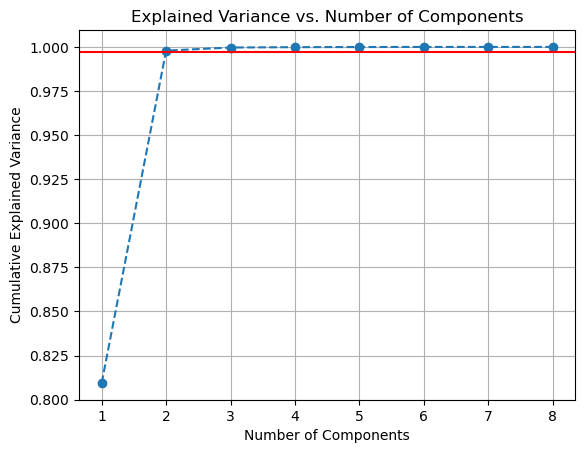

In [30]:
# Plot cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.997, color='r', linestyle='-')  # Example threshold at 95%
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

#### **Observations**

2 composantes suffisent pour expliquer plus de 99% de la variabilité des données.

In [32]:
num_data = new_df[num_cols]

# Refit PCA with selected components
pca_final = PCA(n_components=2)
pca_final.fit(num_data)

# Transform the data
reduced_data = pca_final.transform(num_data)
print(reduced_data)

[[-9.81948589e+01 -1.06418925e+02]
 [-7.22372022e+01 -6.59093750e+01]
 [-1.18358463e+02 -1.01397412e+02]
 [ 6.48812892e+01  7.50994609e+02]
 [-1.05506329e+02 -9.52065214e-01]
 [-1.16729660e+02 -9.29619046e+01]
 [-1.20021434e+02 -9.22084655e+01]
 [-1.00185086e+02 -1.02350199e+02]
 [ 2.88855305e+02 -1.11471181e+02]
 [-1.23874249e+02 -1.04911733e+02]
 [-1.14194166e+02 -8.08743372e+01]
 [ 5.92382841e+01  2.19431095e+02]
 [-6.58554389e+01 -2.67018222e+01]
 [-7.90659161e+01 -7.94016925e+01]
 [-1.06780327e+02 -9.10952455e+00]
 [-1.16634476e+02 -8.59678067e+01]
 [-1.16240702e+02 -5.70941015e+01]
 [-1.09856326e+02 -9.72788880e+01]
 [-4.30870815e+00  3.60960440e+02]
 [-1.19880484e+02 -9.09167793e+01]
 [-1.16339039e+02 -9.74028440e+01]
 [-1.03991876e+02  1.41432734e+01]
 [-8.52070020e+01  1.69559076e+02]
 [-1.04822954e+02 -1.00954218e+01]
 [-6.22811050e+01 -1.09385525e+02]
 [-1.12911346e+02 -3.51404460e+01]
 [-1.07941359e+02 -9.95419430e+01]
 [-1.14517078e+02 -7.95466034e+01]
 [-1.06925757e+02 -3

## DBSCAN

Avec la présence manifeste des valeurs aberrantes, nous débuterons avec l’algorithme DBSCAN qui est particulièrement adapté pour détecter ce type d’observations et les classer généralement comme des “bruits”. Nous avons commencé par essayer de trouver les hyperparamètres qui optimiseront les résultats de la segmentation. Dans cette section, nous avons choisi k=3 comme nombre minimal d’observations pour former un cluster (paramètre min_samples). À partir de ce choix, nous avons utilisé la méthode des K-plus-proches-voisins (KNearestNeighbors) pour calculer la distance de chaque point à son 3ᵉ plus proche voisin, puis tracé un k-distance plot afin d’identifier un seuil optimal pour le paramètre epsilon (ε).

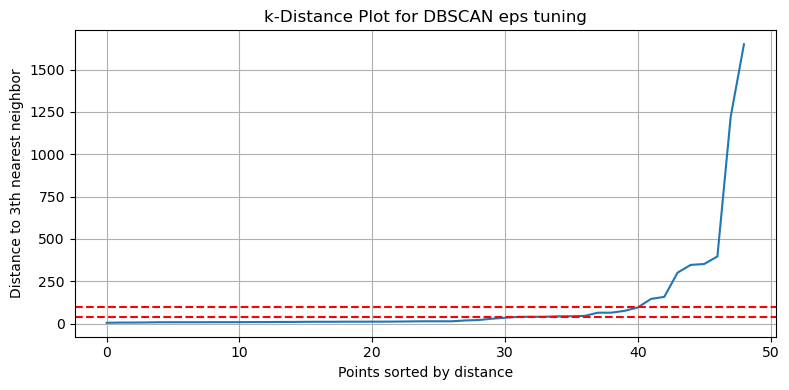

In [34]:
from sklearn.neighbors import NearestNeighbors

# Fit NearestNeighbors
k = 3
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(num_data)

# Get the distances to the k-th nearest neighbor
distances, indices = neighbors_fit.kneighbors(num_data)
k_distances = distances[:, k - 1]  # get the distance to the kth neighbor
k_distances = np.sort(k_distances)

# Plot the k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.axhline(y=40, color='r', linestyle='--')
plt.axhline(y=100, color='r', linestyle='--')
plt.title('k-Distance Plot for DBSCAN eps tuning')
plt.grid(True)
plt.tight_layout()
plt.show()

L’analyse de ce graphique nous suggère une région qui pourrait contenir la valeur optimale de epsilon. Cette région est ici représentée entre les 2 lignes pointillées (entre 40 et 100), la coude sur la courbe correspondant à une transition dans la densité des points. En utilisant une méthode d’ajustement, nous pourrons trouver le seuil optimal pour epsilon à partir duquel l’algorithme pourra distinguer efficacement les groupes denses des points isolés (bruits).

L'ajustement du modèle DBSCAN, à l’aide d’une grille de valeurs pour les hyperparamètres eps (40 à 100, par dizaine) et min_samples (2 à 5, par unité), nous a permis de trouver une combinaison optimale utilisée ensuite entraîner notre modèle sur notre jeu de données.


### Fine tuning pour trouver les meilleurs hyperparamètres

In [36]:
for eps in [40, 50, 60, 70, 80, 90, 100]:
    db = DBSCAN(eps=eps, min_samples=3)
    labels = db.fit_predict(num_data)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps = {eps}: clusters = {n_clusters}, noise points = {n_noise}")

eps = 40: clusters = 1, noise points = 15
eps = 50: clusters = 2, noise points = 10
eps = 60: clusters = 2, noise points = 10
eps = 70: clusters = 2, noise points = 10
eps = 80: clusters = 2, noise points = 8
eps = 90: clusters = 2, noise points = 8
eps = 100: clusters = 2, noise points = 8


In [37]:
eps_values = [40, 50, 60, 70, 80, 90, 100]
min_samples_values = [2, 3, 4, 5]

best_score = -1
best_params = {}
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = db.fit_predict(num_data)
        
        n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
        n_noise = list(db_labels).count(-1)
        
        # Only evaluate silhouette if there are at least 2 clusters
        if n_clusters > 1:
            score = silhouette_score(num_data, db_labels)
        else:
            score = -1
        
        results.append((eps, min_samples, n_clusters, n_noise, score))
        
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

# Convert to DataFrame for inspection
import pandas as pd
grid_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'n_noise', 'silhouette_score'])
grid_df.sort_values(by='n_noise').head(5)

,eps,min_samples,n_clusters,n_noise,silhouette_score
25,100,3,2,8,0.583365
24,100,2,2,8,0.583365
22,90,4,2,8,0.583365
21,90,3,2,8,0.583365
20,90,2,2,8,0.583365


#### **Observations**

Ce tableau, trié selon la meilleure combinaison par ordre décroissant sur le silhouette score, nous donne les valeurs eps et min_samples optimales pour notre jeu de données. De plus, il fournit le nombre de clusters formés, nombre d’observations considérées comme bruit (n_noise) et le silhouette score qui mesure à quel point chaque observation est bien assignée à son cluster. Eps = 100 et min_samples = 3 font partie ds combinaisons qui donnent le meilleur silhouette score (0.58).

In [39]:
db = DBSCAN(eps=100, min_samples=3)
db_labels = db.fit_predict(num_data)

new_df['DBSCAN_Labels'] = db_labels

In [40]:
new_df['DBSCAN_Labels'].value_counts()

DBSCAN_Labels
 0    37
-1     8
 1     4
Name: count, dtype: int64

#### **Observations**

Obtention de 3 clusters dont un pour les observations "noisy".

In [42]:
reduced_country = reduced_data.copy()
reduced_country = pd.DataFrame(reduced_country)
reduced_country['Country'] = df['Country']

In [43]:
reduced_country = reduced_country[['Country', 0, 1]]
reduced_country.rename(columns = {0: 'PCA_1',
                                 1: 'PCA_2'}, inplace = True)
reduced_country.head(2)

,Country,PCA_1,PCA_2
0,Yemen,-98.194859,-106.418925
1,Vietnam,-72.237202,-65.909375


### Représentation 2-D des observations - PCA & t-SNE

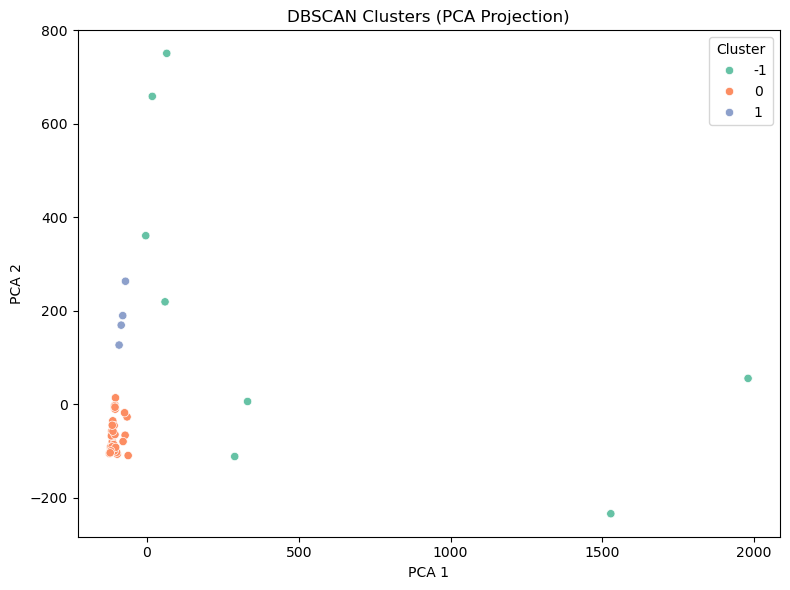

In [45]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=db_labels, palette='Set2')
plt.title('DBSCAN Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [46]:
# Use previously scaled data
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_tsne = tsne.fit_transform(num_data)

# Add to DataFrame
reduced_country['TSNE_1'] = X_tsne[:, 0]
reduced_country['TSNE_2'] = X_tsne[:, 1]

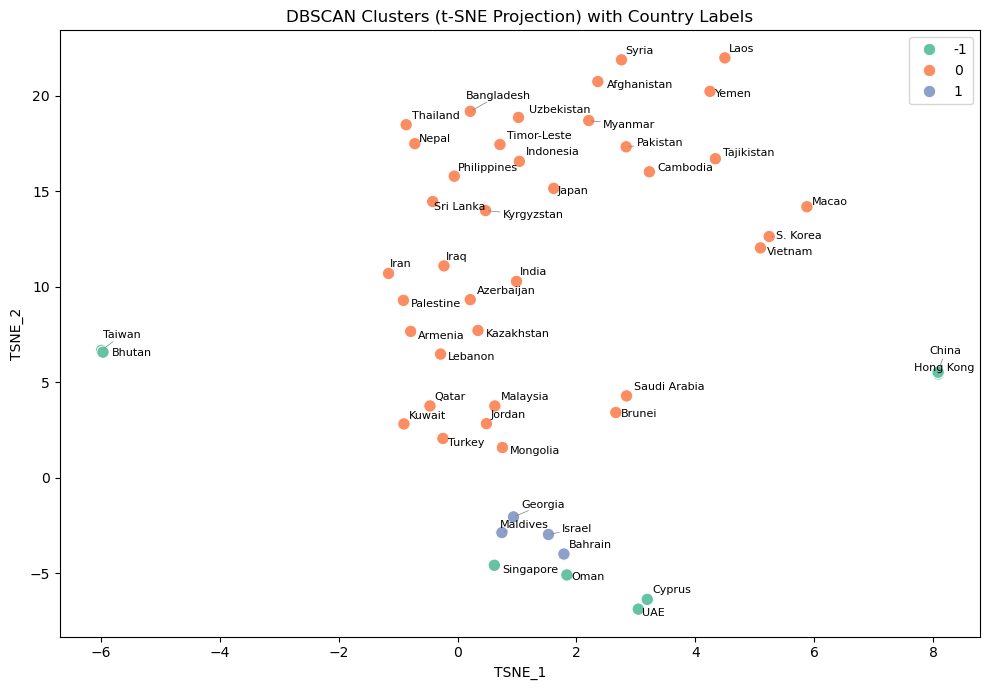

In [47]:
from adjustText import adjust_text

plt.figure(figsize=(10, 7))
sns.scatterplot(data=reduced_country, x='TSNE_1', y='TSNE_2', hue=db_labels, s=80, palette='Set2')

texts = []
for i in range(len(reduced_country)):
    texts.append(
        plt.text(
            reduced_country.loc[i, 'TSNE_1'],
            reduced_country.loc[i, 'TSNE_2'],
            reduced_country.loc[i, 'Country'],
            fontsize=8
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title("DBSCAN Clusters (t-SNE Projection) with Country Labels")
plt.tight_layout()
plt.show()

### **Observation**

Chaque point des deux graphiques représente un pays du jeu de données, positionné selon la similarité de ses caractéristiques face au Covid-19 (taux de létalité, de guérison, d’infection, …). Les couleurs représentent les clusters désignés par DBSCAN. Nous remarquons que la majorité des pays (37 sur 49) appartiennent au cluster 0. Ensuite nous avons quatre (4) autres pays dans le cluster 1, et les autres pays sont considérés comme du bruit (cluster -1).

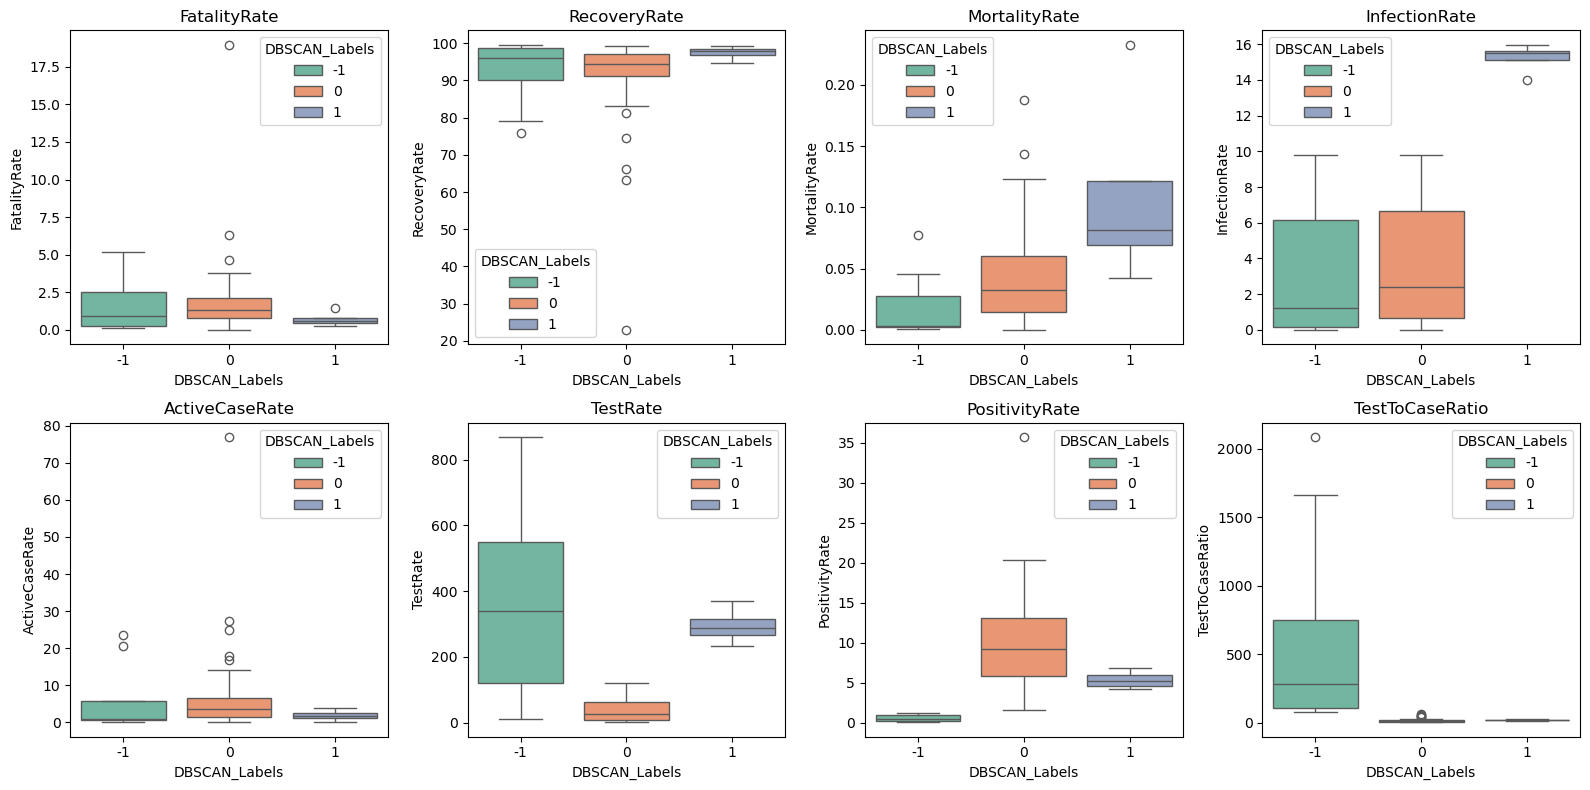

In [48]:
# boxplots by cluster
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col in enumerate(new_df[num_cols]):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=new_df['DBSCAN_Labels'], y=new_df[col], hue=new_df['DBSCAN_Labels'], ax=ax, palette='Set2')
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Analyse des résultats

L’analyse des boxplots issus du clustering DBSCAN permet de dégager trois profils distincts. 
* Le cluster -1, bien qu’étiqueté comme « bruit » par l’algorithme, c'est-à-dire un ensemble d'observations qui n'ont pas pu être classées, regroupe des pays aux performances sanitaires très satisfaisantes : une mortalité faible, une forte capacité de dépistage (TestRate et TestToCaseRatio élevés), une positivité faible, ainsi qu’un taux de récupération élevé et homogène. C'est aussi un groupe avec un "fatality rate" globalement élevé comparativement aux autres groupes et aussi vu le nombre de cas actifs, l'épidémie y est toujours présente mais leur niveau de test montre qu'ils continuent à déployer des efforts pour prendre le contrôle total de la situation.
* Le cluster 0 correspond à des pays davantage exposés, caractérisés par une mortalité plus marquée que le cluster -1, une positivité élevée, une faible intensité de tests, et une présence persistante de cas actifs. Malgré un Recovery Rate correct, la faible couverture en dépistage et la circulation virale encore active suggèrent une gestion fragile de l’épidémie. 
* Enfin, le cluster 1 regroupe des pays ayant manifestement traversé une vague massive de contaminations (InfectionRate très élevé), accompagnée d’une mortalité importante. Toutefois, ces pays se démarquent aujourd’hui par une situation stabilisée : la positivité est assez faible, les cas actifs quasi inexistants et le taux de récupération exceptionnel, traduisant un contrôle efficace après une période critique.

En résumé, nous pouvons dire que l'algorithme DBSCAN a divisé notre échantillon en ces trois groupes: les pays en difficulté (cluster 0), les pays en rétablissement (cluster 1) et les pays "résilients" (cluster -1).

## KMeans

Pour l’implémentation de l’algorithme, nous procédons directement à la recherche du nombre de clusters optimal en utilisant la méthode du coude et le silhouette score. L’algorithme a été appliquée sur les données transformées en composantes principales (2 composantes).

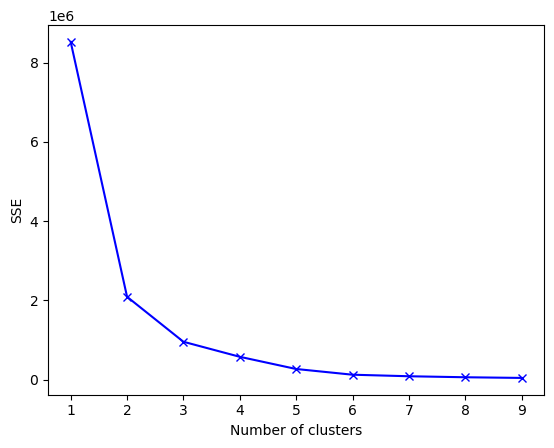

In [62]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(reduced_data)
    sse[k] = kmeans.inertia_

# Visualization
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

**Observations**

Avec la somme des erreurs au carré (SSE) pour chaque nombre de cluster, nous remarquons que le SSE diminue drastiquement à partir de 2 clusters, la diminution du SSE par la suite apparaissant un peu marginal. Le SSE mesure la compacité des clusters: plus c’est petit, mieux c’est. Même si le coude n’est pas clairement représenté ici, k=2 semble être une bonne estimation.

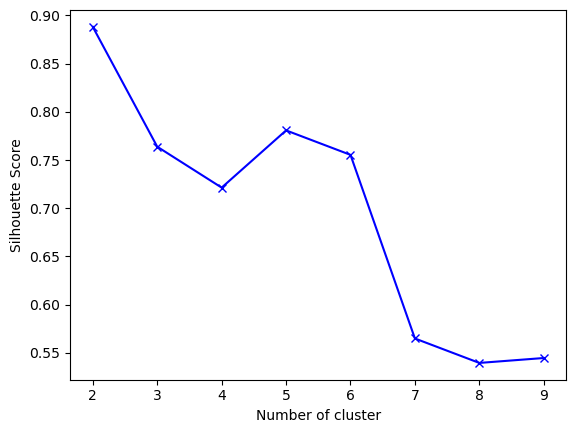

In [64]:
# Empty dictionary to store the silhouette score for each k
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the silhouette score for that k.
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(reduced_data)
    labels = kmeans.predict(reduced_data)
    sc[k] = silhouette_score(reduced_data, labels)


# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")

plt.show()

**Observations**

Avec l'analyse de la courbe du silhouette score, nous constatons que le nombre de clusters pour lequel le score est plus élevé est 2 (0.89). Nous pouvons donc affirmer que dans ce scenario, pour l’algorithme K-Means, k=2 est le nombre de cluster optimal pour notre jeu de données.

L'ajustement de l’algorithme K-Means avec pour paramètre n_cluster = 2, nous a permis d’obtenir une segmentation des pays de l’Asie du Sud-Est en 2 groupes:

In [66]:
# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
km_labels = kmeans.fit_predict(num_data)
new_df['KM_Labels'] = km_labels
new_df['KM_Labels'].value_counts()

KM_Labels
1    47
0     2
Name: count, dtype: int64

### **Observation**

Nous avons obtenu ces 2 clusters, mais les groupes semblent peu granuleux. Nous risquons donc d’avoir le plus grand groupe très hétérogène.

### Représentation 2-D des observations - PCA & t-SNE

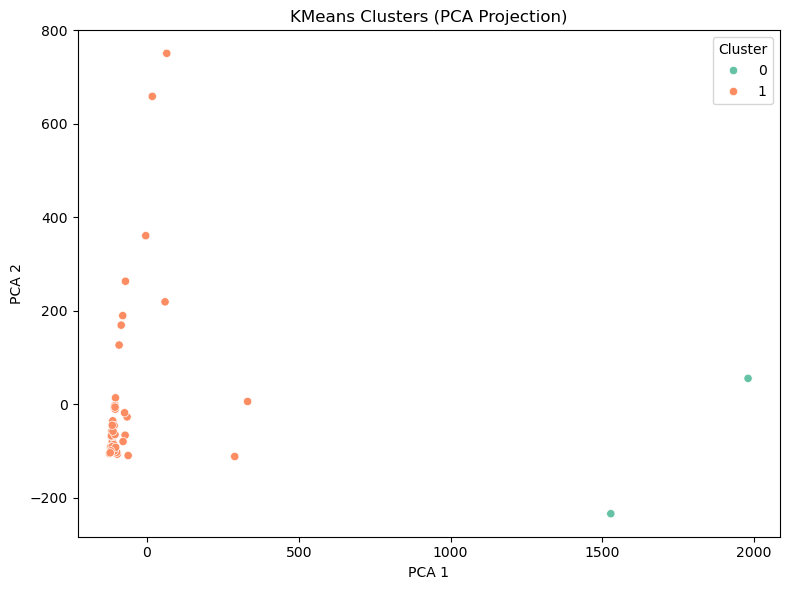

In [69]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=km_labels, palette='Set2')
plt.title('KMeans Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

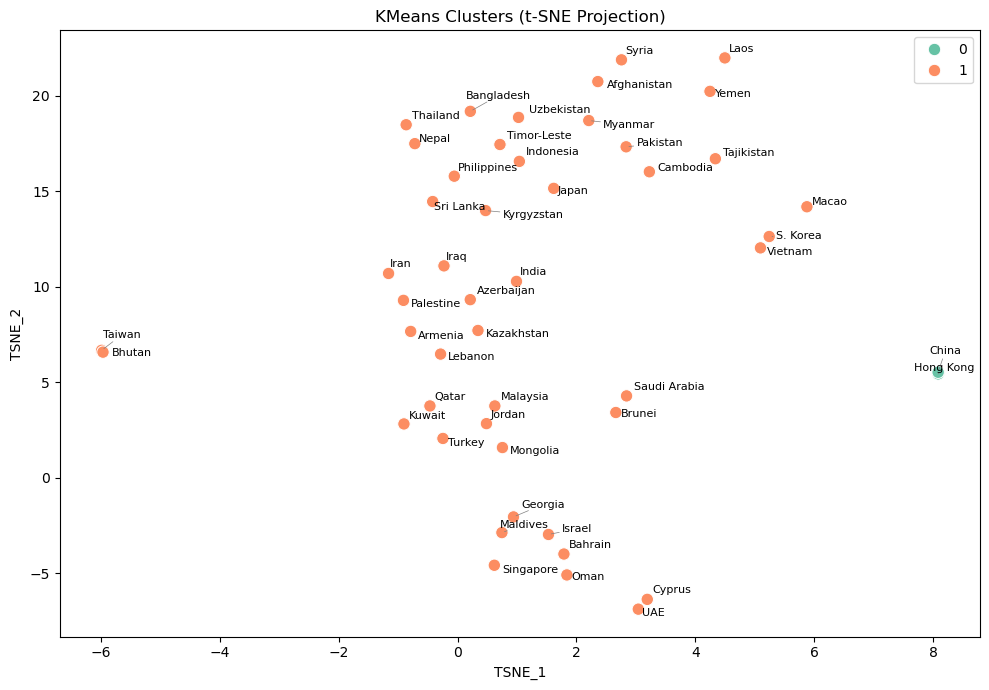

In [70]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=reduced_country, x='TSNE_1', y='TSNE_2', hue=km_labels, s=80, palette='Set2')

texts = []
for i in range(len(reduced_country)):
    texts.append(
        plt.text(
            reduced_country.loc[i, 'TSNE_1'],
            reduced_country.loc[i, 'TSNE_2'],
            reduced_country.loc[i, 'Country'],
            fontsize=8
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title("KMeans Clusters (t-SNE Projection)")
plt.tight_layout()
plt.show()

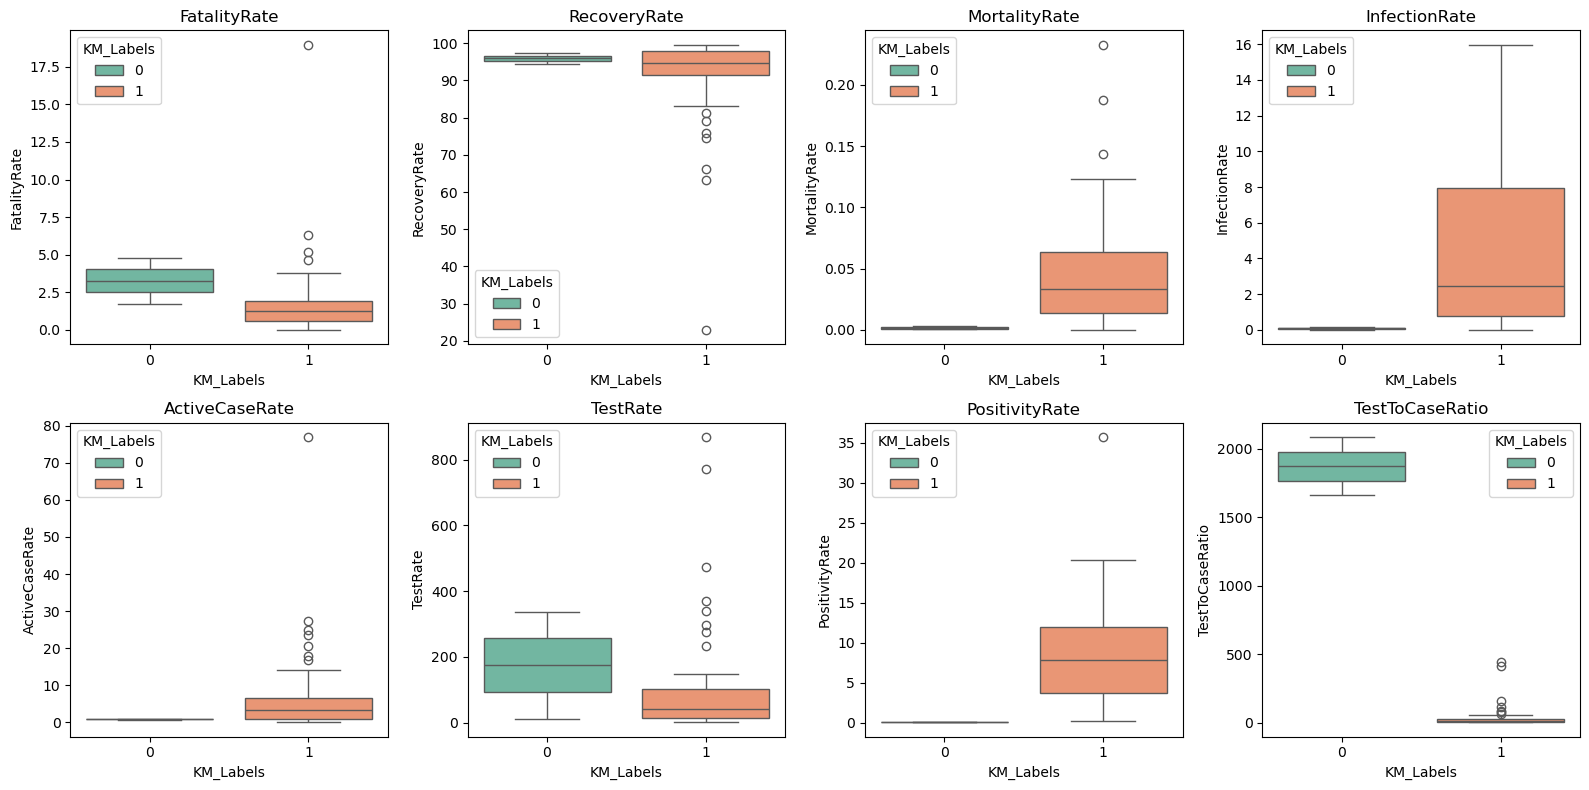

In [71]:
# boxplots by cluster
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col in enumerate(new_df[num_cols]):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=new_df['KM_Labels'], y=new_df[col], hue=new_df['KM_Labels'], ax=ax, palette='Set2')
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Analyse des résultats

L’analyse des résultats du clustering KMeans fait émerger deux profils épidémiologiques bien distincts. 
* Le cluster 0 regroupe des pays ayant clairement dépassé la phase critique de la pandémie. Tous les indicateurs semblent l'indiquer. Leur situation est marquée par une quasi-absence de circulation virale, une positivité nulle, presqu'aucun cas actif, et un taux de mortalité extrêmement bas. Ces pays maintiennent une capacité de dépistage élevée, comme en témoigne leur TestRate et un TestToCaseRatio très élevé, traduisant une politique de surveillance soutenue malgré une épidémie désormais sous contrôle. 
* À l’opposé, le cluster 1 regroupe des pays encore en phase de circulation active du virus. Le nombre de cas actifs y est élevé dans certains pays, la positivité importante, et l’infection largement répandue. Le taux de mortalité y est significatif, et certains pays du groupe présentent des taux de guérison très bas, traduisant des situations sanitaires hétérogènes, voire critiques. Bien que ces pays mènent un dépistage relativement ciblé, leur niveau global de tests est insuffisant au vu de la dynamique épidémique, ce que confirme un TestToCaseRatio très faible. Ce cluster représente donc un groupe hétérogène à risque, dans lequel des efforts supplémentaires sont nécessaires pour maîtriser la propagation du virus.

Globalement, l'algorithme K-Means a scindé notre échantillon en 2 groupes: les pays stablisés (cluster 0) et les pays en phase active (cluster 1).

## Hierarchical Clustering

Le clustering hiérarchique agglomératif est une approche de regroupement ascendante dans laquelle chaque point de données démarre comme son propre cluster. L’algorithme fusionne ensuite de manière itérative les clusters les plus proches jusqu’à ce qu’il ne reste qu’un seul cluster, selon une métrique de distance (par exemple euclidienne, Manhattan) et un critère de liaison.

Les critères de liaison sont utilisés pour définir la distance entre les clusters pendant le processus de clustering hiérarchique. Il existe plusieurs méthodes de couplage, notamment le couplage simple, le couplage complet, le couplage moyen et la méthode de Ward. La liaison simple prend en compte la distance minimale entre les points des deux groupes, tandis que la liaison complète utilise la distance maximale. La liaison moyenne calcule la distance moyenne entre toutes les paires de points dans les clusters, et la méthode de Ward minimise la variance totale au sein du cluster.

Un dendrogramme est un diagramme arborescent qui représente visuellement la disposition des clusters formés par regroupement hiérarchique. Il illustre la fusion de clusters et les distances auxquelles ces fusions se produisent. Les dendrogrammes sont des outils précieux pour interpréter les résultats du clustering hiérarchique, car ils fournissent un aperçu des relations entre les clusters et de la structure globale des données. En analysant un dendrogramme, on peut identifier une structure de regroupement pertinente en définissant un seuil de distance au-delà duquel les fusions ne sont plus significatives.

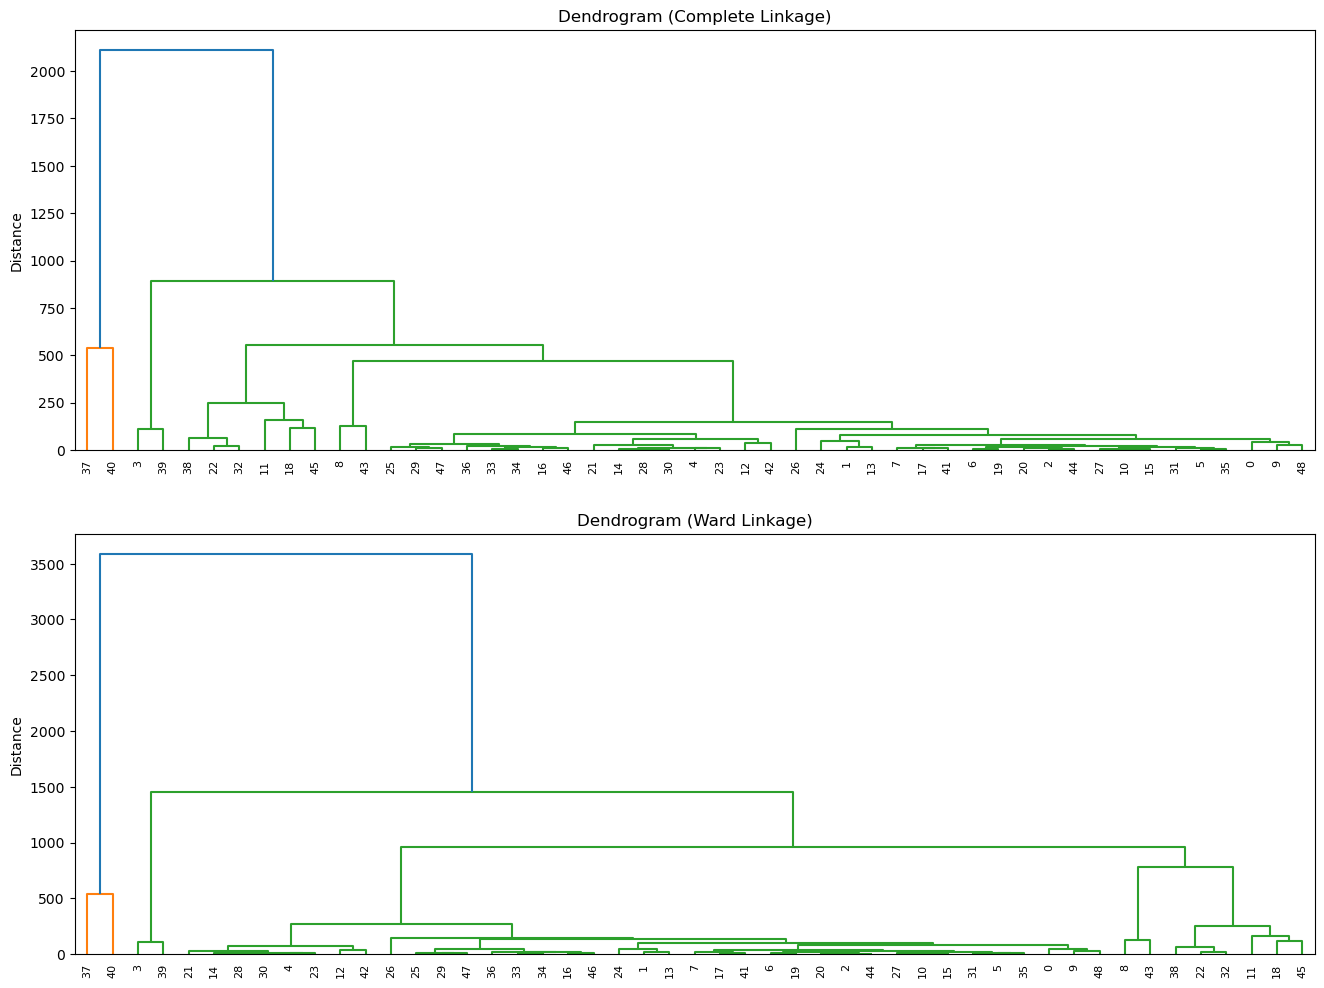

In [51]:
# The List of all linkage methods to check
methods = ['complete',
          'ward']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (16, 12))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(num_data, metric = 'euclidean', method = method)

    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

**Observations**

Le résultat de l’application de cette algorithme est représenté sous la forme de ce dendrogramme, en utilisant la méthode de liaison de Ward qui vise à minimiser la variance intra-cluster lors de chaque fusion. Ce dendrogramme illustre les regroupements successifs des observations en fonction de leur similarité. En ordonnées, nous avons la distance et la hauteur des branches correspond au niveau de dissimilarité entre les groupes fusionnés. Le seuil de distance fixé autour de 1000 semble constituer un point de coupure optimal dans le dendrogramme pour la méthode de liaison Ward, révélant des clusters suffisamment distincts pour appuyer une segmentation significative des pays. En traçant une ligne horizontale à 850, nous identifions quatre clusters qui pourraient nous fournir des informations intéressantes sur le comportement des pays face au Covid-19.

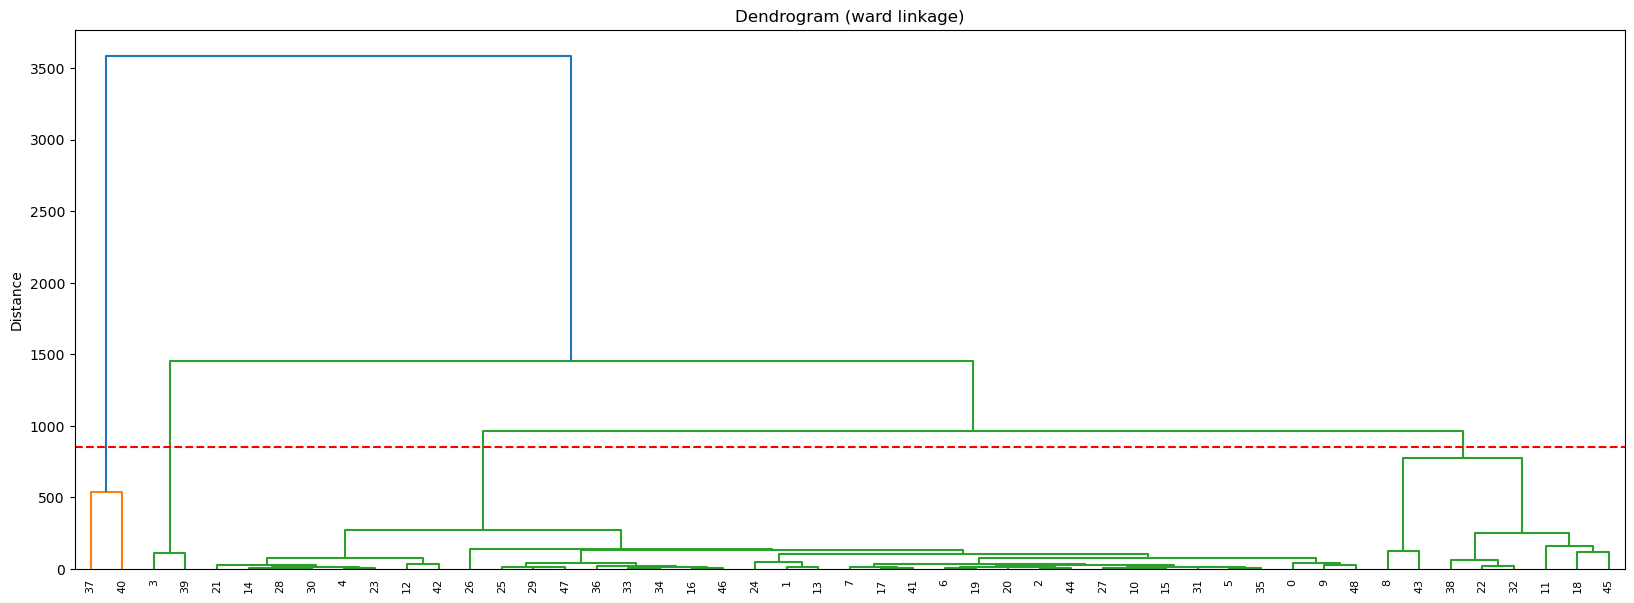

In [53]:
plt.figure(figsize = (20, 7))
plt.title("Dendrogram (ward linkage)")
dend = dendrogram(linkage(num_data, method = 'ward'))
plt.axhline(y = 850, color = 'r', linestyle = '--')
plt.ylabel('Distance')
plt.show();

Nous avons ajusté notre modèle avec comme hyperparamètre “t” un seuil (threshold) égal à 850 avec la function fcluster() de la librairie scipy. Nous avons obtenu les quatre clusters suivants:

In [54]:
hc_labels = fcluster(Z, t=850, criterion='distance')
new_df['HC_Labels'] = hc_labels
new_df['HC_Labels'].value_counts()

HC_Labels
3    37
4     8
2     2
1     2
Name: count, dtype: int64

### **Observation**

Nous avons déjà une bien meilleure désagrégation qu'avec le k-means.

### Représentation 2-D des observations - PCA & t-SNE

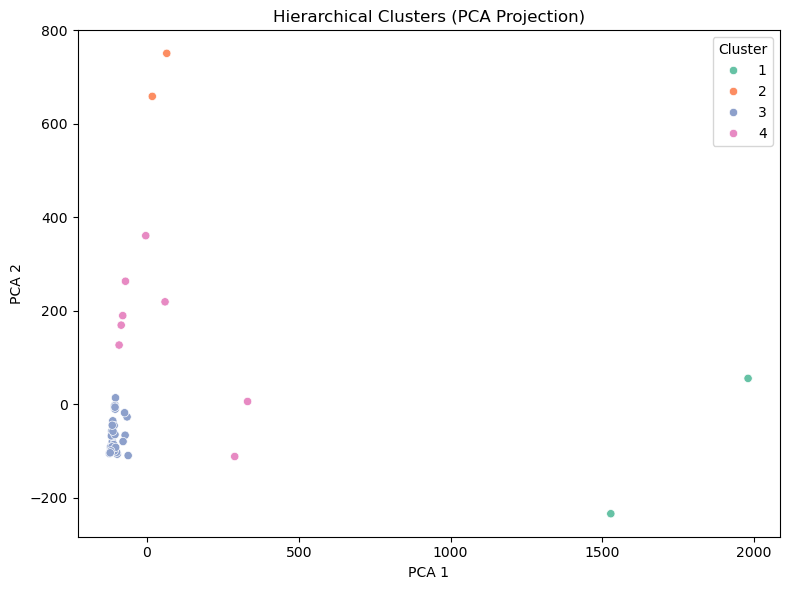

In [57]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=hc_labels, palette='Set2')
plt.title('Hierarchical Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

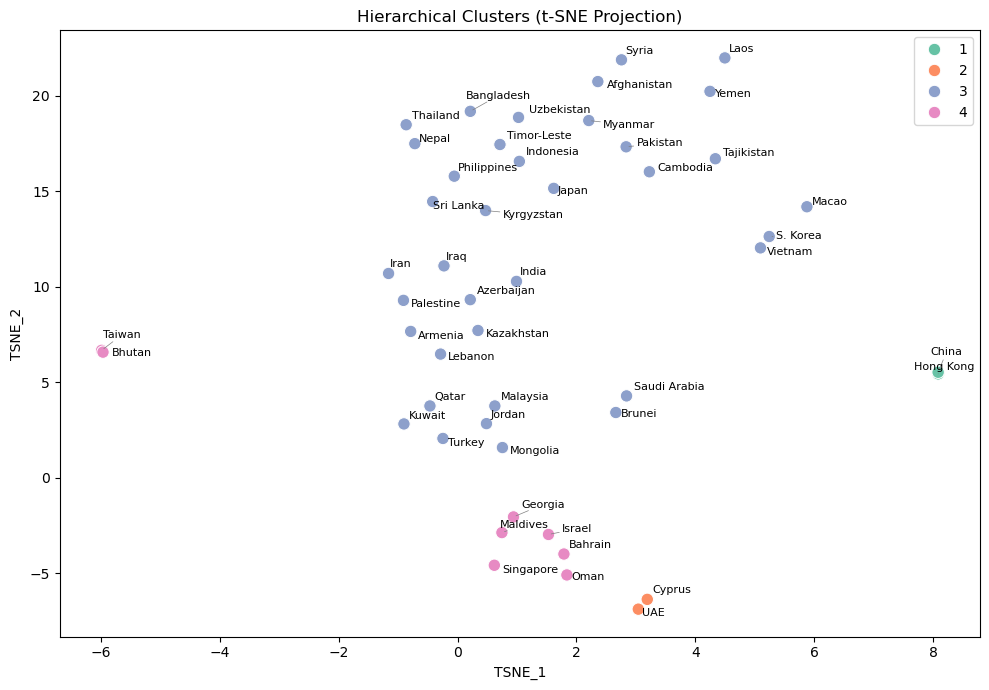

In [58]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=reduced_country, x='TSNE_1', y='TSNE_2', hue=hc_labels, s=80, palette='Set2')

texts = []
for i in range(len(reduced_country)):
    texts.append(
        plt.text(
            reduced_country.loc[i, 'TSNE_1'],
            reduced_country.loc[i, 'TSNE_2'],
            reduced_country.loc[i, 'Country'],
            fontsize=8
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title("Hierarchical Clusters (t-SNE Projection)")
plt.tight_layout()
plt.show()

### **Observation**

Nous notons que Chine et Hong Kong font toujours groupe ensemble, Cyprus et les Emirats Arabes Unis constituent à eux deux un cluster. Taiwan, Bhutan, Georgia, Maldives, Israel, Bahrain, Singapore et Oman appartiennent au même cluster, et les autres pays sont dans le dernier cluster.

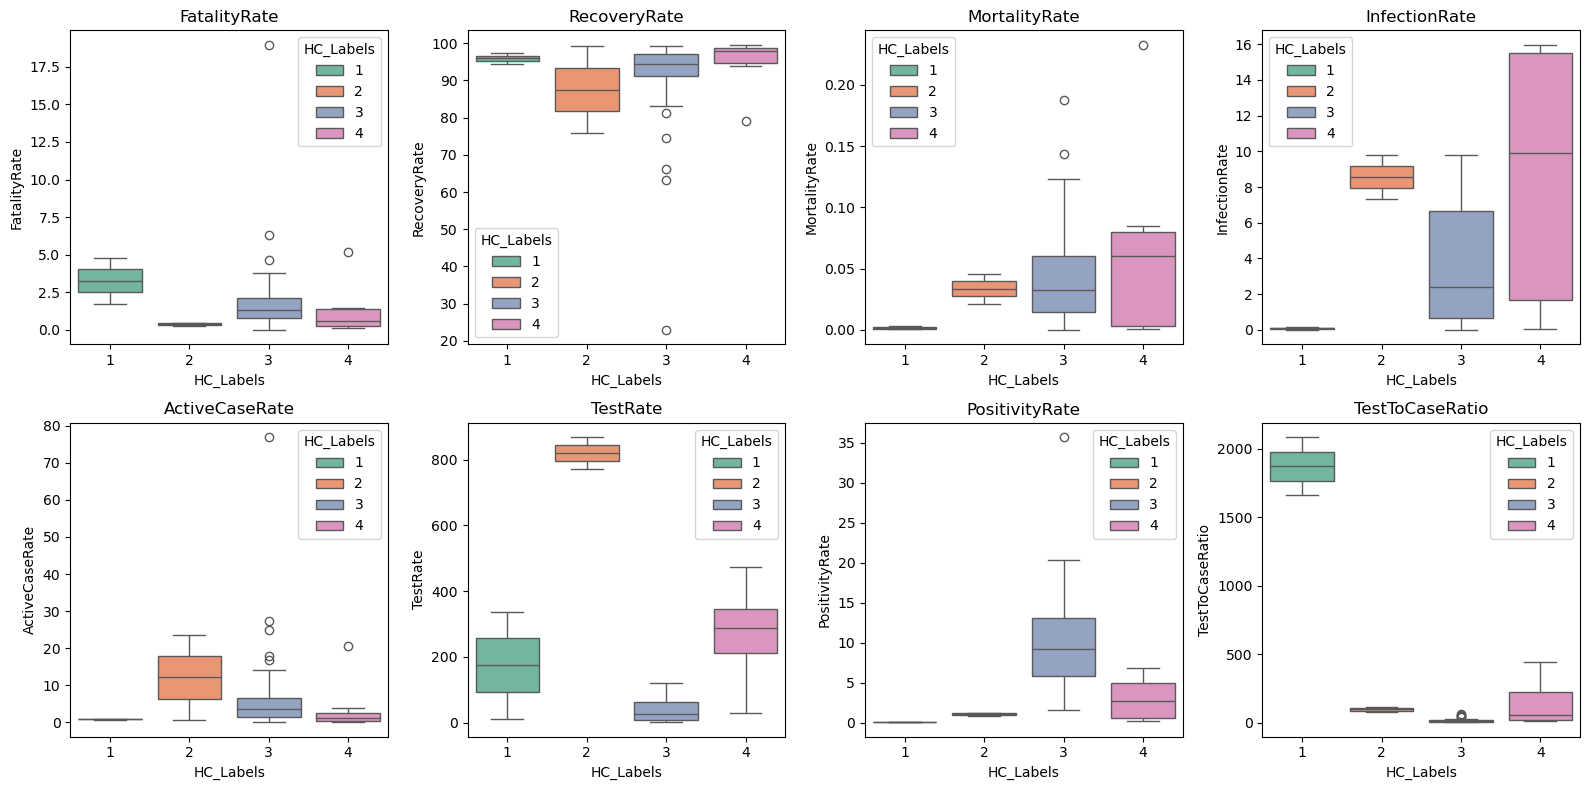

In [59]:
# boxplots by cluster
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col in enumerate(new_df[num_cols]):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=new_df['HC_Labels'], y=new_df[col], hue=new_df['HC_Labels'], ax=ax, palette='Set2')
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Analyse des résultats

L’analyse des boxplots révèle quatre profils épidémiologiques bien distincts. 
* Le cluster 1 rassemble les pays les plus performants en matière de gestion sanitaire. Ils se caractérisent par une mortalité très faible, une positivité et un nombre de cas actifs quasi nuls, ainsi qu’un dépistage massif (TestRate élevé et TestToCaseRatio exceptionnel). Leur situation reflète un contrôle total de l’épidémie. 
* Le cluster 2, quant à lui, regroupe des pays qui semlent en pleine phase épidémique, avec un grand nombre de cas actifs (comparé aux autres clusters) et une forte propagation du virus. Cependant, ils déploient une stratégie de dépistage intensive et efficace, comme en témoignent leur "TestRate" très élevé et leur "TestToCaseRatio" assez faible, traduisant un dépistage précoce et bien ciblé. Le "FatalityRate" y est également le plus faible, ce qui renforce l’idée d’une bonne prise en charge clinique. Le "RecoveryRate" plus bas (médiane environ 87%) suggère que de nombreux cas sont encore en cours. 
* Le cluster 3 présente un profil plus hétérogène, avec une forte variabilité dans les taux de mortalité, d’infection et de récupération, indiquant des situations contrastées entre pays. Leur niveau de test indique un dépistage ciblé mais ça reste quand même très faible vu le taux d'infection.
* Enfin, le cluster 4 regroupe des pays ayant vraisemblablement traversé une vague importante d’infections, mais aujourd’hui relativement stabilisés : malgré une mortalité et une infection toujours élevées, on observe un bon niveau de test, une faible positivité et une forte récupération. Ces pays semblent en transition vers une maîtrise durable de la situation.

En résumé, l'algorithme "Hierarchical clustering" a regroupé nos données de la manière suivante: les pays leaders en gestion sanitaire (cluster 1), les pays en phase épidémique (cluster 2), les pays en transition (cluster 4), et les pays hététogènes (cluster 3).

**Observations**

Nous avons nos 2 clusters, mais les groupes sont peu granuleux. Nous risquons d'avoir le plus grand groupe très hétérogène.

## Gaussian Mixture Model

Le modèle de mélange gaussien (GMM) repose sur l’idée que les données observées sont issues d’une population hétérogène composée de plusieurs sous-populations homogènes, appelées composantes du mélange, chacune modélisée par une loi normale multivariée. Bien que les variables utilisées ici ne suivent pas globalement une distribution normale, le GMM reste applicable car il ne requiert pas la normalité globale des données. En effet, le modèle suppose que chaque cluster localement peut être approché par une distribution gaussienne, ce qui permet de modéliser des données non normales à condition que la structure interne des groupes soit cohérente . 

Cette capacité d’approximation locale rend le GMM particulièrement adapté à des situations où les données présentent des distributions complexes ou asymétriques. Dans le cadre de ce projet, cette approche a été utilisée pour segmenter les pays fournis en fonction de plusieurs indicateurs liés à la pandémie. Malgré l’absence de transformation des données (pas de normalisation stricte ni de réduction de dimension), le modèle a permis d’identifier des clusters cohérents, appuyés par un silhouette score élevé (0.74), confirmant la pertinence de cette méthode dans un contexte de données réelles et non idéales.


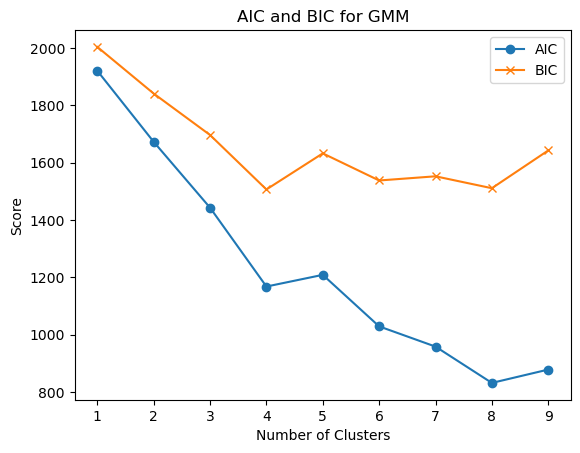

In [74]:
aic = []
bic = []
k_values = range(1, 10)

for k in k_values:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(num_data)
    aic.append(gmm.aic(num_data))
    bic.append(gmm.bic(num_data))

# Plot AIC and BIC
plt.plot(k_values, aic, label='AIC', marker='o')
plt.plot(k_values, bic, label='BIC', marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC for GMM')
plt.legend()
plt.show()

**Observations**

Pour déterminer le nombre optimal de clusters, nous avons testé différentes configurations en nous appuyant sur les critères AIC et BIC. Le BIC a indiqué que 4 clusters offraient le meilleur compromis entre performance et simplicité, atteignant un minimum clair à cette valeur. En revanche, l'AIC continuait à diminuer jusqu'à 8 clusters, suggérant un ajustement toujours amélioré mais au prix d'une complexité plus grande. Nous avons finalement retenu la solution à 4 clusters proposée par le BIC, privilégiant ainsi un modèle à la fois interprétable et statistiquement robuste, tout en évitant le sur-ajustement qu'aurait pu entraîner un nombre trop élevé de classes.

In [76]:
# Fit a GMM with k components
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(num_data)

# Predict cluster labels
gmm_labels = gmm.predict(num_data)

# 4. Add results to your DataFrame
new_df['GMM_Labels'] = gmm_labels
new_df['GMM_Labels'].value_counts()

GMM_Labels
1    38
0     7
3     2
2     2
Name: count, dtype: int64

### Représentation 2-D des observations - PCA & t-SNE

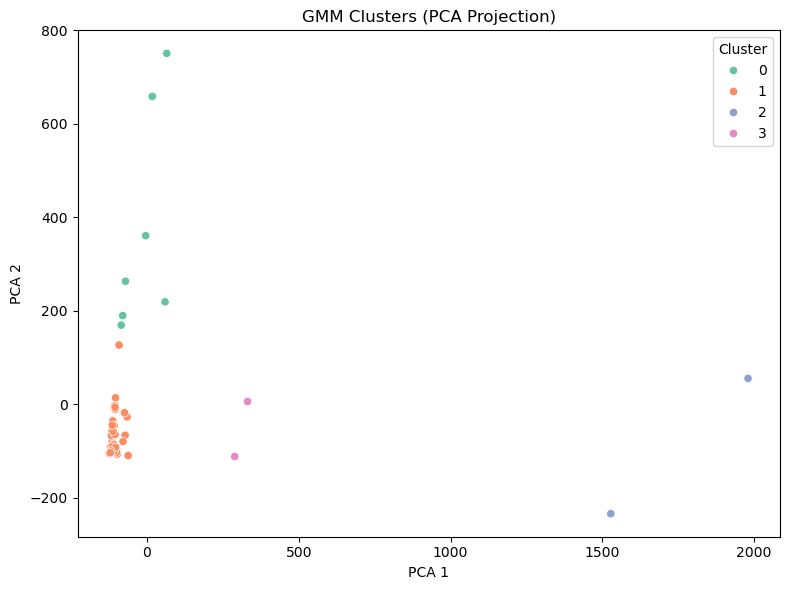

In [78]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=gmm_labels, palette='Set2')
plt.title('GMM Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

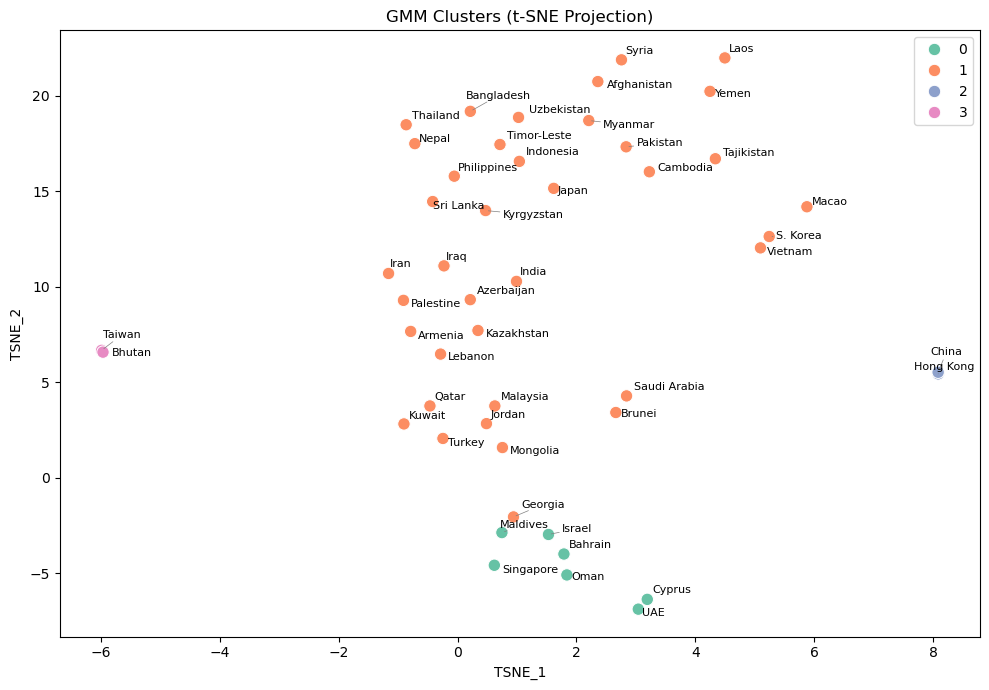

In [79]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=reduced_country, x='TSNE_1', y='TSNE_2', hue=gmm_labels, s=80, palette='Set2')

texts = []
for i in range(len(reduced_country)):
    texts.append(
        plt.text(
            reduced_country.loc[i, 'TSNE_1'],
            reduced_country.loc[i, 'TSNE_2'],
            reduced_country.loc[i, 'Country'],
            fontsize=8
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title("GMM Clusters (t-SNE Projection)")
plt.tight_layout()
plt.show()

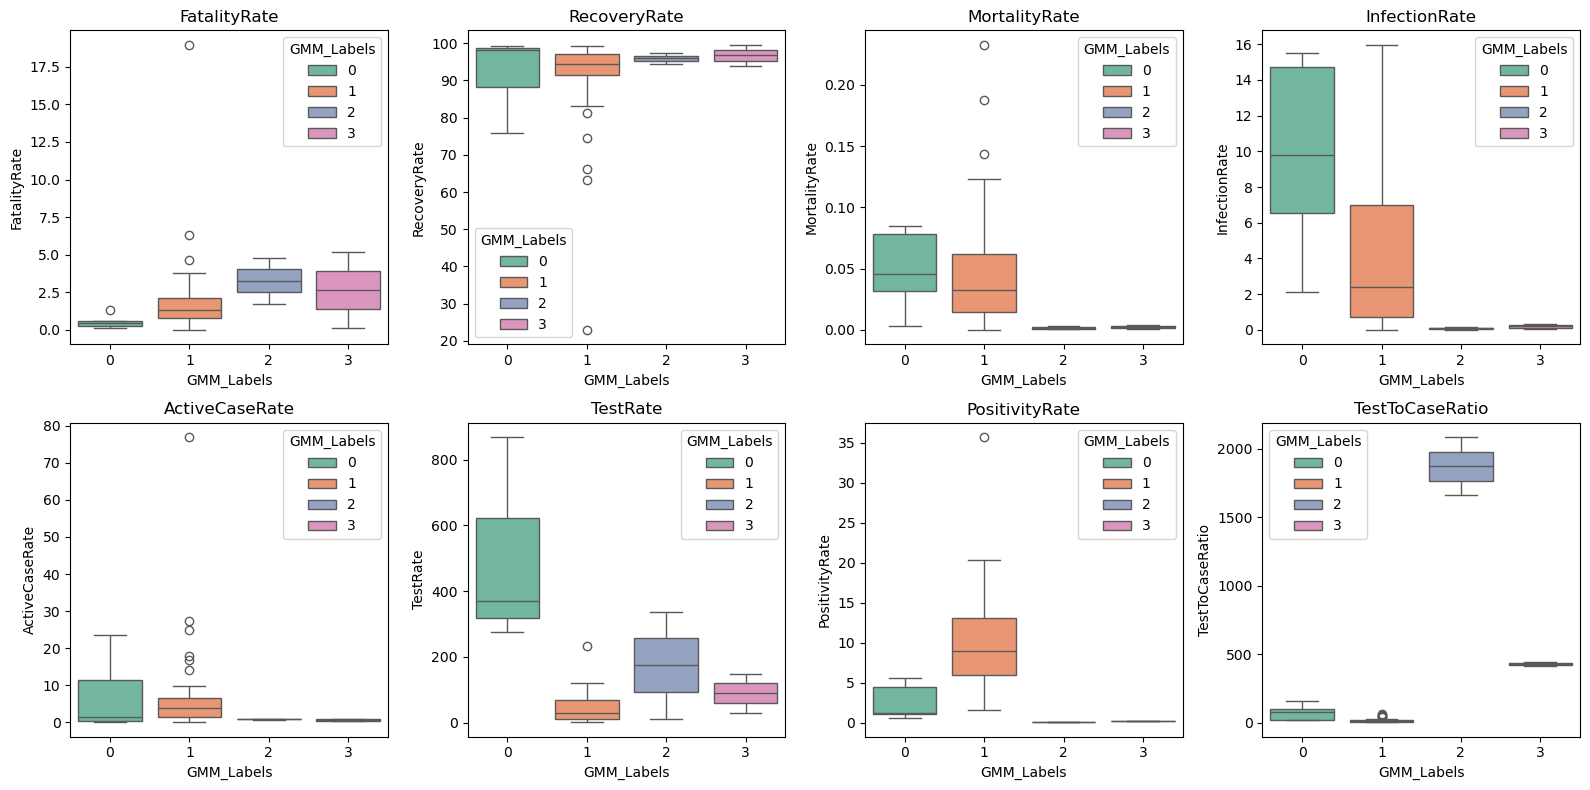

In [80]:
# boxplots by cluster
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col in enumerate(new_df[num_cols]):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=new_df['GMM_Labels'], y=new_df[col], hue=new_df['GMM_Labels'], ax=ax, palette='Set2')
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Analyse des résultats

L’algorithme GMM a permis d’identifier quatre groupes de pays aux dynamiques sanitaires distinctes face à la COVID-19.
* Le cluster 2 représente les pays les plus avancés dans le contrôle de la pandémie : la circulation virale y est quasi inexistante, les cas actifs sont résiduels, et le dépistage y est massif. Malgré un fatality rate historiquement élevé, ces pays affichent aujourd’hui des performances exemplaires en matière de prévention, de guérison et de surveillance.
* Le cluster 3 rassemble des pays également stabilisés, avec une infection très faible, une prise en charge efficace, et un taux de mortalité maîtrisé. Le niveau de dépistage est plus modéré que dans le cluster 2, mais reste adapté à la situation épidémiologique apaisée.
* Le cluster 0 regroupe des pays où l’épidémie est toujours active, avec une infection et une positivité importantes, un TestToCaseRatio modeste, et une mortalité globale élevée malgré une létalité apparente faible. Leur niveau de dépistage est correct mais inégal, et les performances de guérison varient fortement.
* Enfin, le cluster 1 traduit une situation plus fragile, marquée par une forte positivité, une hétérogénéité dans les taux de guérison, une mortalité globale variable, et un dépistage très faible, ce qui laisse présager un manque de contrôle sanitaire global.

En résumé, l'algorithme GMM nous donne les clusters suivants: les pays performants (cluster 3), les pays stabilisés (cluster 2), les pays en phase active (cluster 0) et les pays fragiles (cluster 1).


## Comparaison des résultats des différents algorithmes

In [84]:
labels = ['DBSCAN_Labels', 'KM_Labels', 'HC_Labels', 'GMM_Labels']
score_results = []
df_score = new_df.copy()
df_score.drop(['Country'], axis = 1, inplace=True)

for label in labels:
    score = silhouette_score(df_score, df_score[label])
    score_results.append({
        'Label': label,
        'n_clusters': len(df_score[label].unique()),
        'silhouette_score': score
    })

score_df = pd.DataFrame(score_results)
score_df

,Label,n_clusters,silhouette_score
0,DBSCAN_Labels,3,0.583370
1,KM_Labels,2,0.885542
2,HC_Labels,4,0.711356
3,GMM_Labels,4,0.744930


### Choix final parmi les algorithmes utilisées

Avec les résultats obtenus des 4 algorithmes implémentées, si l'on se base sur le silhouette score obtenu, nous voyons que le K-means est l'algorithme qui offre le meilleur score (0.89) et le Gaussian Mixture Model vient en deuxième position avec un score de 0.75. Nous rappelons que le silhouette score est un indice utilisé pour évaluer la qualité d'un clustering et qu'il est compris entre -1 et 1, et mesure à quel point chaque observation est bien assignée à son cluster. Il évalue la cohésion interne (similitude avec ls points de son propre cluster) et la séparation externe (différence avec les autres observations des autres clusters), et un silhouette score > 0.7 est jugé excellent selon la littérature.

Cependant, s'il est vrai que k-means obtient le meilleur silhouette score, l'information qu'elle offre est trop aggrégée. En effet, nous obtenons 2 groupes peu granuleux: 47 / 2, le groupe 47 étant loin d'être homogène. Nous nous rabattons donc sur les résultats de l'algorithme GMM qui nous offre 4 clusters bien distincts de son côté. L'analyse des différents facteurs (représentés sous forme de boîtes à moustache) a fait ressortir des renseignements intéressants qui nous aident à classer les pays selon leur performance face au Covid-19 pour la période considérée.

### Représentation aggrégée des résultats de GMM

In [88]:
df_gmm = new_df.drop(['DBSCAN_Labels', 'HC_Labels', 'KM_Labels'], axis = 1)

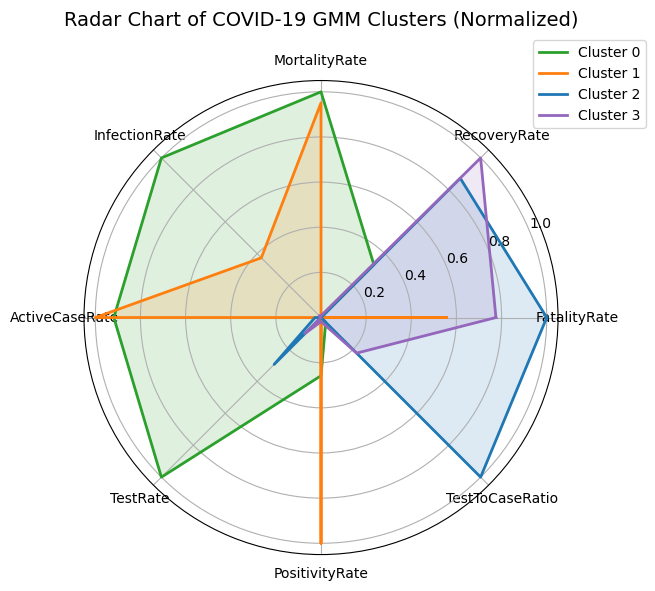

In [90]:
# Calculer la moyenne des indicateurs pour chaque cluster
cluster_means = df_gmm.groupby('GMM_Labels').mean(numeric_only=True)

# Normalisation des valeurs (min-max)
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Paramètres du radar chart
categories = normalized.columns.tolist()
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # fermer le cercle

# Initialisation du radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
colors = ['#2ca02c', '#ff7f0e', '#1f77b4', '#9467bd']  # une couleur par cluster

# Tracer chaque cluster
for idx, row in normalized.iterrows():
    values = row.tolist()
    values += values[:1]  # répéter le 1er point pour fermer la courbe
    ax.plot(angles, values, label=f'Cluster {idx}', linewidth=2, linestyle='solid', color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

# Mise en forme des axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title('Radar Chart of COVID-19 GMM Clusters (Normalized)', size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

## Contrôle des résultats

In [95]:
new_df[new_df['Country'].isin(['China', 'Hong Kong'])]

,Country,FatalityRate,RecoveryRate,MortalityRate,InfectionRate,ActiveCaseRate,TestRate,PositivityRate,TestToCaseRatio,DBSCAN_Labels,HC_Labels,KM_Labels,GMM_Labels
37,Hong Kong,1.736083,97.424403,0.002812,0.161980,0.839514,337.814628,0.047949,2085.537941,-1,1,0,2
40,China,4.807981,94.452568,0.000322,0.006699,0.739450,11.116331,0.060264,1659.355133,-1,1,0,2


In [97]:
df[df['Country'].isin(['China', 'Hong Kong'])]

,ID,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalCasesPerMillion,TotalDeathsPerMillion,TotalTests,TotalTestsPerMillion,TotalPopulation,FatalityRate,RecoveryRate,MortalityRate,InfectionRate,ActiveCaseRate,TestRate,PositivityRate,TestToCaseRatio
37,38,Hong Kong,12269,213.0,11953,103,1620,28.0,25587465.0,3378146.0,7574410,1.736083,97.424403,0.002812,0.161980,0.839514,337.814628,0.047949,2085.537941
40,41,China,96423,4636.0,91074,713,67,3.0,160000000.0,111163.0,1439323776,4.807981,94.452568,0.000322,0.006699,0.739450,11.116331,0.060264,1659.355133


## Conclusion

Comme indiqué au début de nos analyses, il a été important pour nous, afin de mieux aborder le sujet et de répondre à la problématique posée, de mettre en place plusieurs approches tant sur la méthodologie que sur le choix de variables à analyser ensemble afin de cerner plusieurs aspects en lien avec le Covid-19. Puisque les pays ne sont pas tous homogènes et les problèmes auxquels font face ces pays diffèrent également. On fait notamment référence à la politique de santé publique en place dans ces pays, qui diffère dans la façon de gérer la pandémie, de soigner les cas de Covid et de limiter au maximum les décès de leurs patients. On a également trouvé importante la prise en compte de la taille de chaque pays, puisque c’est un facteur majeur à la fois de propagation de cette pandémie mais aussi dans la répartition des richesses au sein d’un pays en termes de soins reçus.

Nous avons donc développé une approche dans laquelle l’intérêt s’est porté uniquement sur les indicateurs calculés. Ces indicateurs se trouvent pour la grande majorité dans le document « Comment bien compter les cas ? Les principaux concepts pour comprendre l’épidémie de Covid-19 » (ASPHER, Mai 2020). Ces indicateurs qui témoignent d’autres aspects non pris en compte dans le jeu de données facilitent encore mieux la comparaison entre pays et l’identification de comportements ou de performances sanitaires similaires. Quatre (4) algorithmes ont été appliquées sur ce nouveau jeu de données : nous avons repris DBSCAN et K-Means, et nous y avons ajouté le clustering hiérarchique agglomératif et le modèle de mélange gaussien (GMM). Chacun de ces algorithmes nous a permis d’avoir une classification distincte pour chaque pays. Mais au final, nous avons choisi le modèle GMM qui nous a donné un nombre assez désagrégé de cluster (4) et un silhouette score assez élevé (0.75).

Les résultats du GMM ont montré que la Chine et Hong Kong ont été des modèles dans la lutte contre le covid-19 avec une circulation virale quasi-inexistante, un dépistage massif et un taux de guérison excellent. Suivi de près par Taiwan et le Bhoutan avec un taux d’infection très faible et de mortalité maitrisé, mais un taux de dépistage modéré par rapport au groupe Chine-Hong Kong. Ce sont les pays des groupes 0 et 1 qui apparaissent beaucoup plus dans le besoin car après 1 an de crise, l’épidémie est toujours active chez eux un taux d’infection, de cas actif et de mortalité important, un niveau de dépistage vraiment bas pour des pays comme l’Indonésie, l’Inde, le Sri Lanka, le Liban, les Philippines, le Japon et tous les autres dans le groupe 1. Ces pays apparaissent dans le besoin, mais pas nécessairement économique (par exemple le Japon). Les stratégies de lutte sanitaire implémentées par la Chine et Hong Kong, et même Taiwan et le Bhoutan doivent être transférées à ces pays en difficulté pour les aider à vaincre cette épidémie. Les aides humanitaires viendront aussi à ceux qui sont en difficulté financière.